# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [52]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [53]:
# import the data
data = pd.read_csv('stock_data.csv')

## Data Overview

- Observations
- Sanity checks

### Checking the shape of the dataset

In [54]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 340 rows and 15 columns.


- There are 340 rows and 15 columns.

### Displaying few rows of the dataset

In [55]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

Observations:
- The dataset consists of companies spanning different economic sectors.
- Numerous companies within the dataset experienced a decrease in their stock prices over a 13-week period, signifying a decline in their stock performance.
- Additionally, a substantial portion of the companies reported negative net income, indicating that they suffered financial losses in the preceding quarter.

### Checking the data types of the columns for the dataset

In [56]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

Observations:
- Only `Ticker Symbol`, `Security`, `GICS Sector`, and `GICS Sub Industry` are categorical variables.
- All other columns are numerical variables (float64 / int64).
- The memory used is 40/0+ KB.

### Creating a copy of original data

In [57]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking for duplicates and missing values

In [58]:
# checking for duplicate values
df.duplicated().sum()

0

- There are no duplicate values in the data set.

In [59]:
# checking for missing values
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

- There are no missing values in the data set.

### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [60]:
df.describe(include='all').T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327936   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

Observations:

- The dataset encompasses companies representing 11 distinct 'GICS sectors' and 104 unique 'GICS Sub Industry' groups.

- The majority of the companies in the dataset belong to the Industrials sector.

- On average, the current stock price of the companies in the dataset is approximately 81, with a notable deviation from the median value, which stands at around 59.7.

- On average, the companies in the dataset have experienced a 4.1% increase in their stock prices.

- The companies, on average, have reported a net income of 1.5 billion.

- The average 'Net Cash Flow' is approximately 55,537,621, with a significant difference from its median value, which is approximately 20,980,000.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate analysis

In [61]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Current Price`**

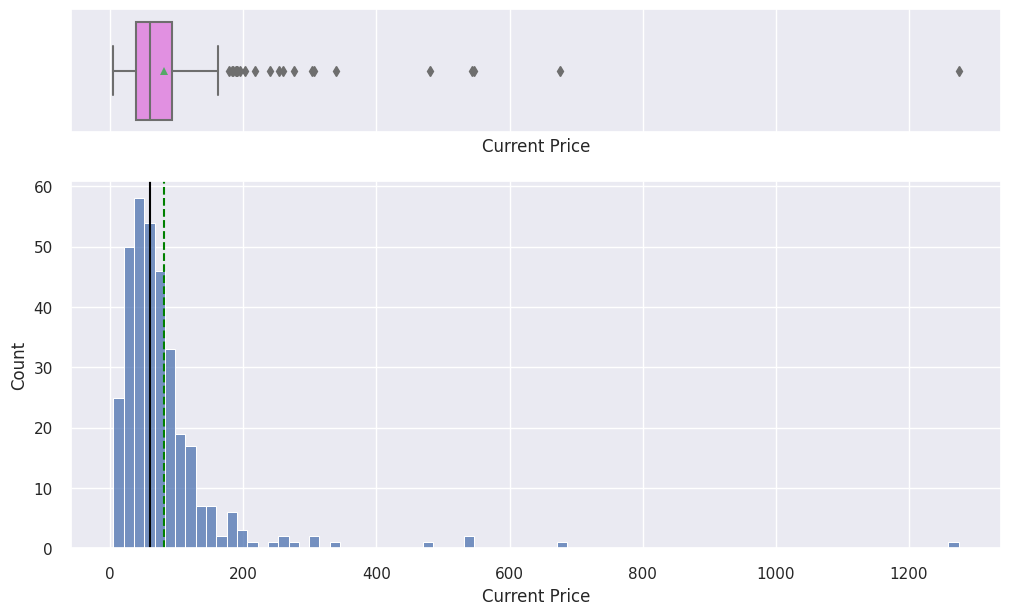

In [62]:
histogram_boxplot(df, 'Current Price')

- `Current Price` exhibits a heavily right-skewed distribution, with some outliers on the right side.
- It indicates that the majority of companies have lower stock prices.
- Few outliers on the right side which indicate significantly higher stock prices.

**`Price Change`**

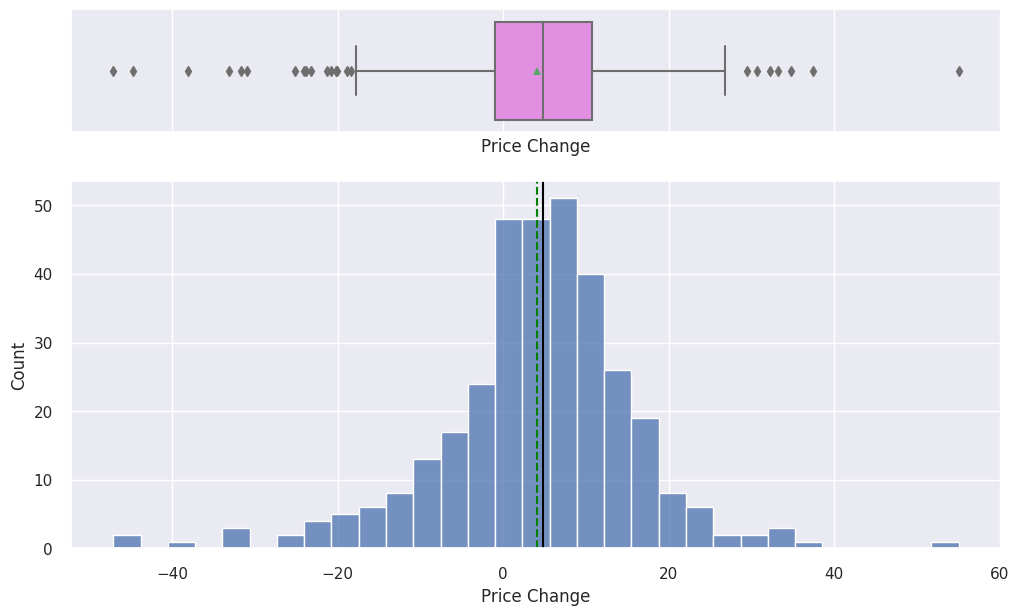

In [63]:
histogram_boxplot(df, 'Price Change')

- `Price Change` closely follows a normal distribution, suggesting that the majority of companies experienced relatively moderate percentage changes in their stock prices.
- However, there are some outliers on both sides, indicating that a few companies saw substantial increases and decreases in their stock prices, deviating from the typical price change pattern.

**`Volatility`**

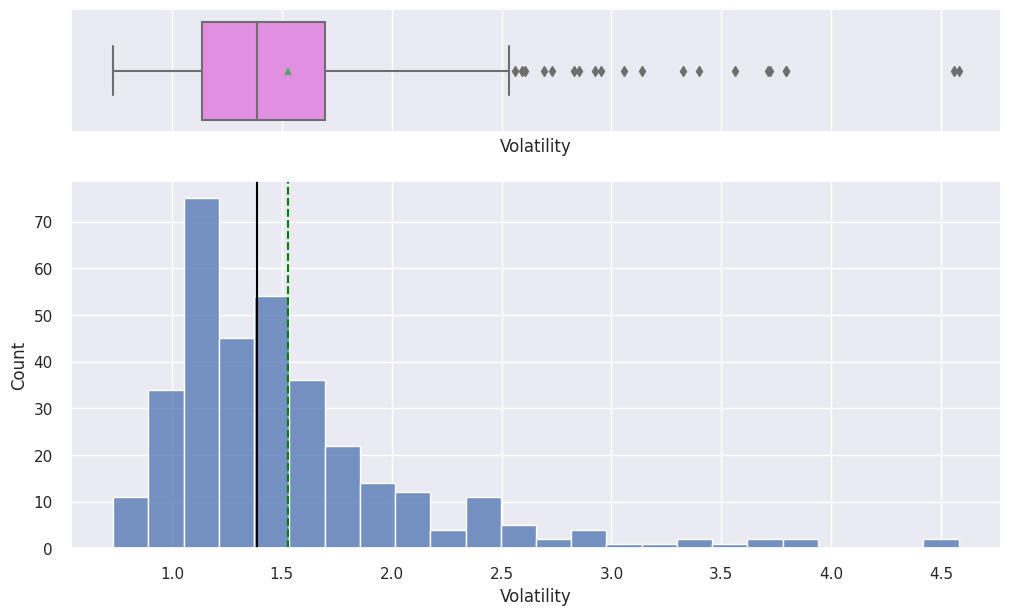

In [64]:
histogram_boxplot(df, 'Volatility')

- `Volatility` exhibits a slightly right-skewed distribution, indicating that most companies have relatively consistent levels of stock price fluctuation.
- However, there are some outliers on the right side, suggesting that a few companies experienced significantly higher stock price volatility compared to the majority.

**`ROE`**

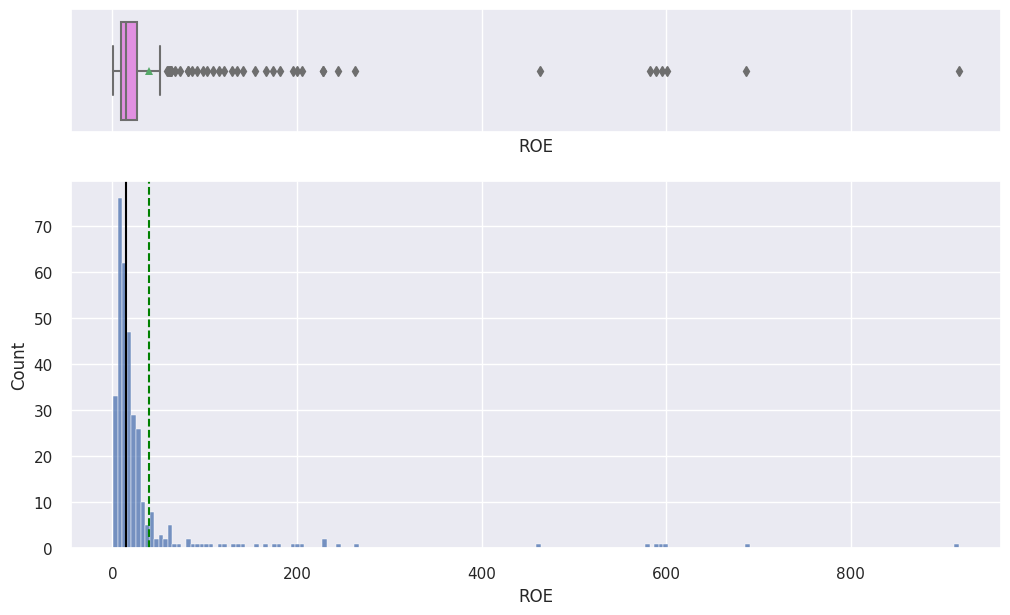

In [65]:
histogram_boxplot(df, 'ROE')

- `ROE` exhibits a heavily right-skewed distribution, indicating that a majority of companies have relatively lower Return on Equity values.
- Additionally, there are numerous outliers on the right side of the distribution, suggesting that a significant number of companies achieved exceptionally high Return on Equity values, deviating from the typical ROE pattern.

**`Cash Ratio`**

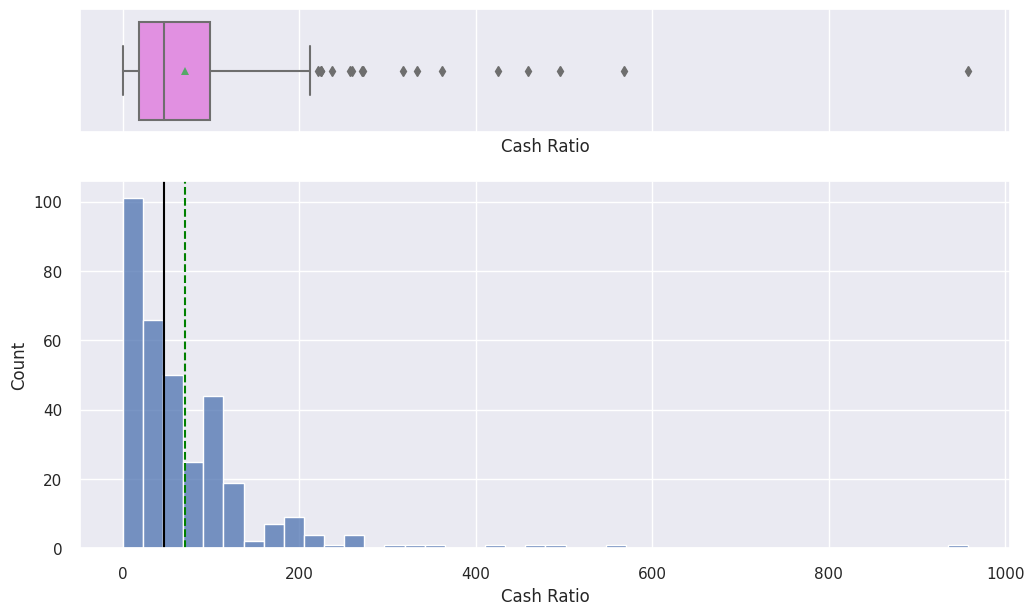

In [66]:
histogram_boxplot(df, 'Cash Ratio')

- `Cash Ratio` exhibits a right-skewed distribution, suggesting that most companies tend to have lower cash ratios, which is the ratio of cash and cash equivalents to current liabilities.
- However, there are some outliers on the right side of the distribution, indicating that a few companies maintain significantly higher cash ratios compared to the majority of companies, possibly indicating stronger liquidity positions.

**`Net Cash Flow`**

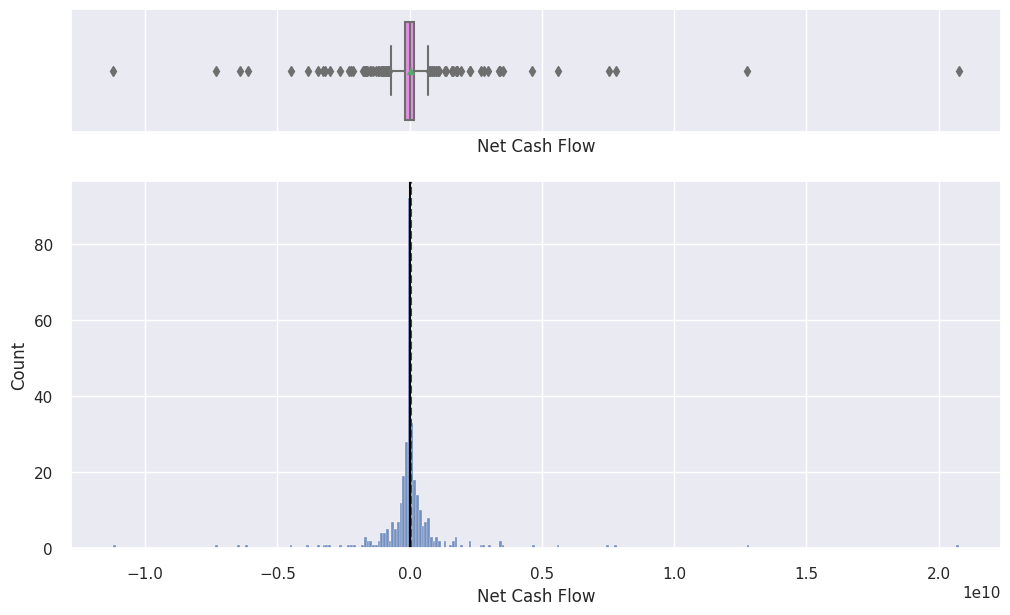

In [67]:
histogram_boxplot(df, 'Net Cash Flow')

- The distribution of `Net Cash Flow` closely approximates a normal distribution, implying that many companies have relatively typical patterns of cash flow.
- However, there are numerous outliers present in the distribution, suggesting that a significant number of companies experienced exceptionally high or low net cash flows, deviating from the typical cash flow pattern.

**`Net Income`**

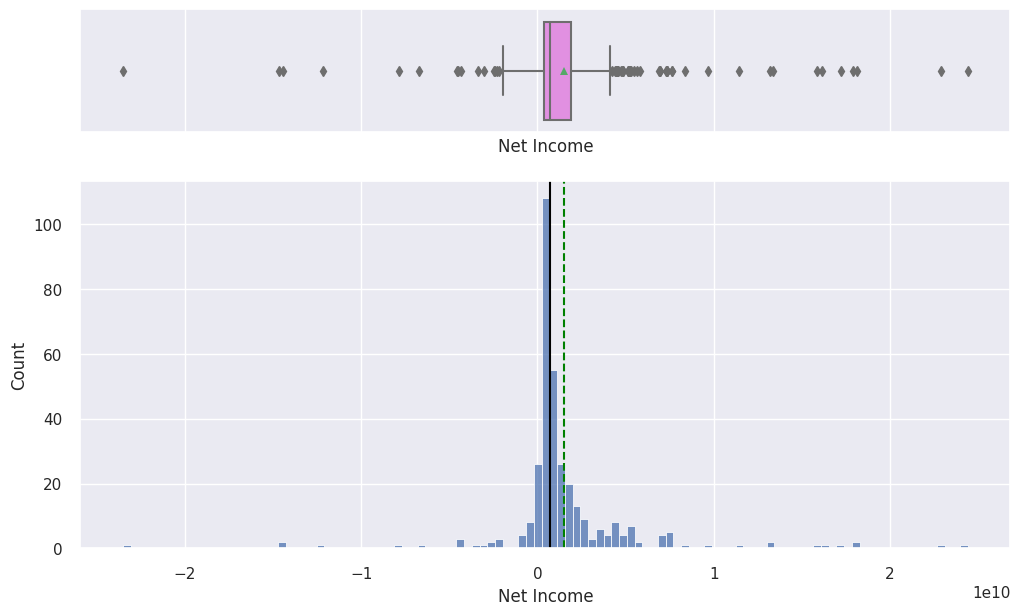

In [68]:
histogram_boxplot(df, 'Net Income')

- The distribution of `Net Income` closely resembles a normal distribution, indicating that a substantial number of companies have relatively typical levels of net income.
- However, there are numerous outliers in the distribution, suggesting that a significant number of companies reported exceptionally high or low net income figures, deviating from the typical income pattern.

**`Earnings Per Share`**

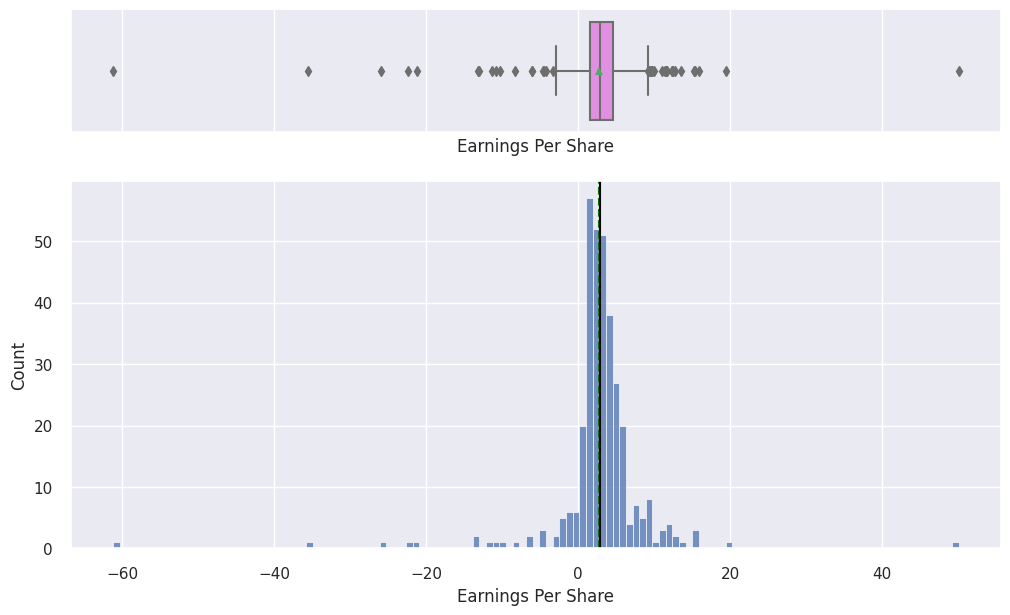

In [69]:
histogram_boxplot(df, 'Earnings Per Share')

- The distribution of `Earnings Per Share` closely approximates a normal distribution, indicating that a substantial number of companies have earnings per share values that align with the typical pattern.
- However, there are some outliers present in the distribution, suggesting that a few companies reported significantly higher or lower earnings per share compared to the majority, deviating from the typical `Earnings Per Share` pattern.

**`Estimated Shares Outstanding`**

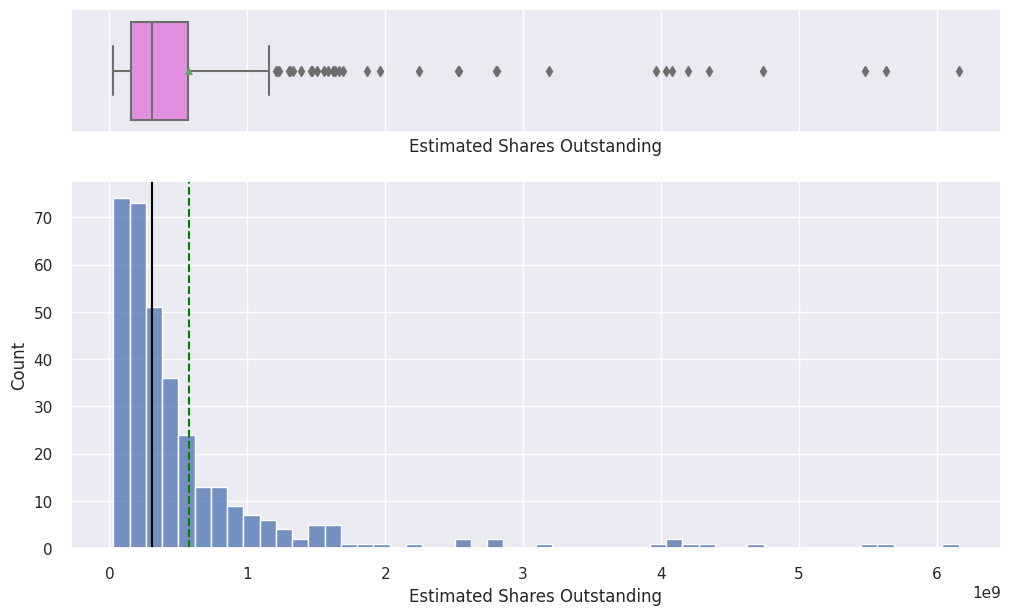

In [70]:
histogram_boxplot(df, 'Estimated Shares Outstanding')

- `Estimated Shares Outstanding` displays a right-skewed distribution, indicating that a majority of companies have lower estimated shares outstanding.
- Furthermore, there are numerous outliers on the right side of the distribution, signifying that a significant number of companies have a substantially higher number of shares outstanding compared to the majority, leading to the right-skew in the distribution.

**`P/B Ratio`**

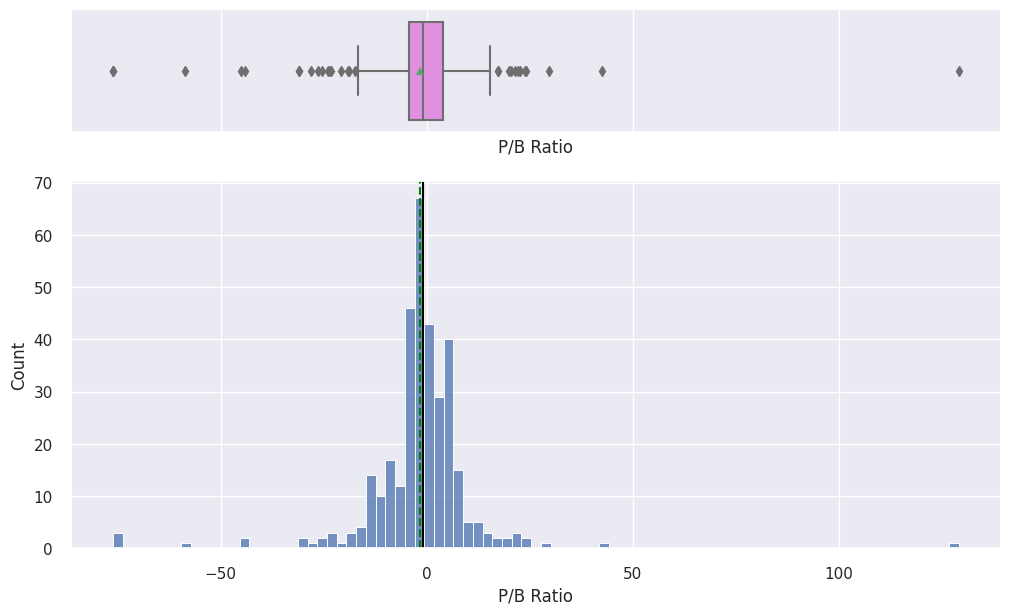

In [71]:
histogram_boxplot(df, 'P/B Ratio')

- The distribution of `P/B Ratio` closely resembles a normal distribution, suggesting that a substantial number of companies have price-to-book ratios that align with the typical pattern.
- However, there are outliers present on both sides of the distribution, indicating that some companies reported significantly higher or lower price-to-book ratios compared to the majority, deviating from the typical `P/B ratio` pattern.

In [72]:
# function to create labeled barplots
def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n],  # No need to reverse the order
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.gca().invert_xaxis()  # Reverse the x-axis
    plt.show()  # show the plot

**`GICS Sector`**

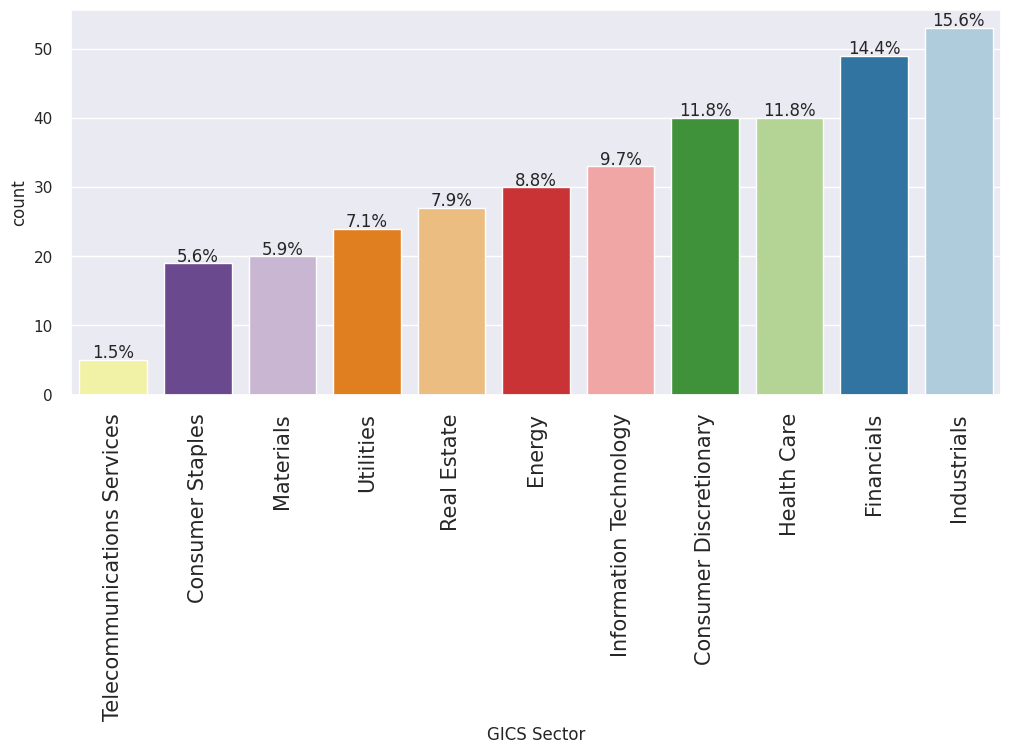

In [73]:
labeled_barplot(df, 'GICS Sector', perc=True)

Observations:
- Most of the companies are from infustials sector (15.6%) in the data set, followed closely by those from the financial sector (14.4%).
- Onnly 1.5% of companies in the data set are from Telecommunications sector.

**`GICS Sub Industry`**

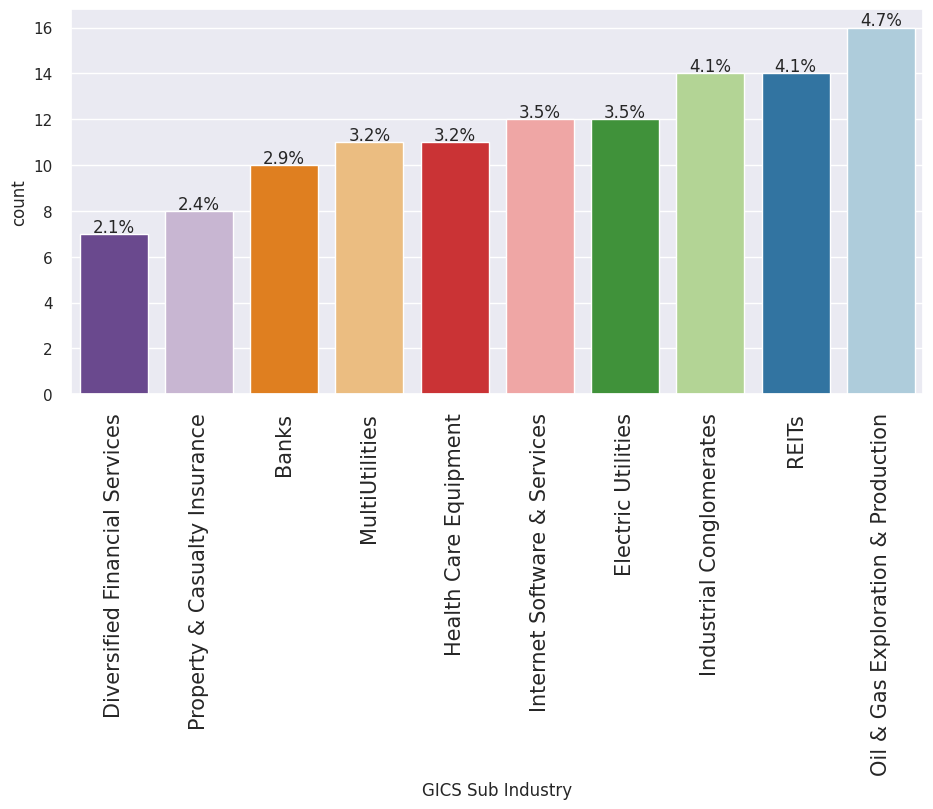

In [74]:
labeled_barplot(df, 'GICS Sub Industry', perc=True, n=10)

Observations:
- Most of the companies (4.7%) in the data set belong to the Oil and Gas Exploration and Production sub-industry.
- Onnly 2.1% of companies in the data set belong to the Diversified Financial Services sub industry.

### Bivariate Analysis

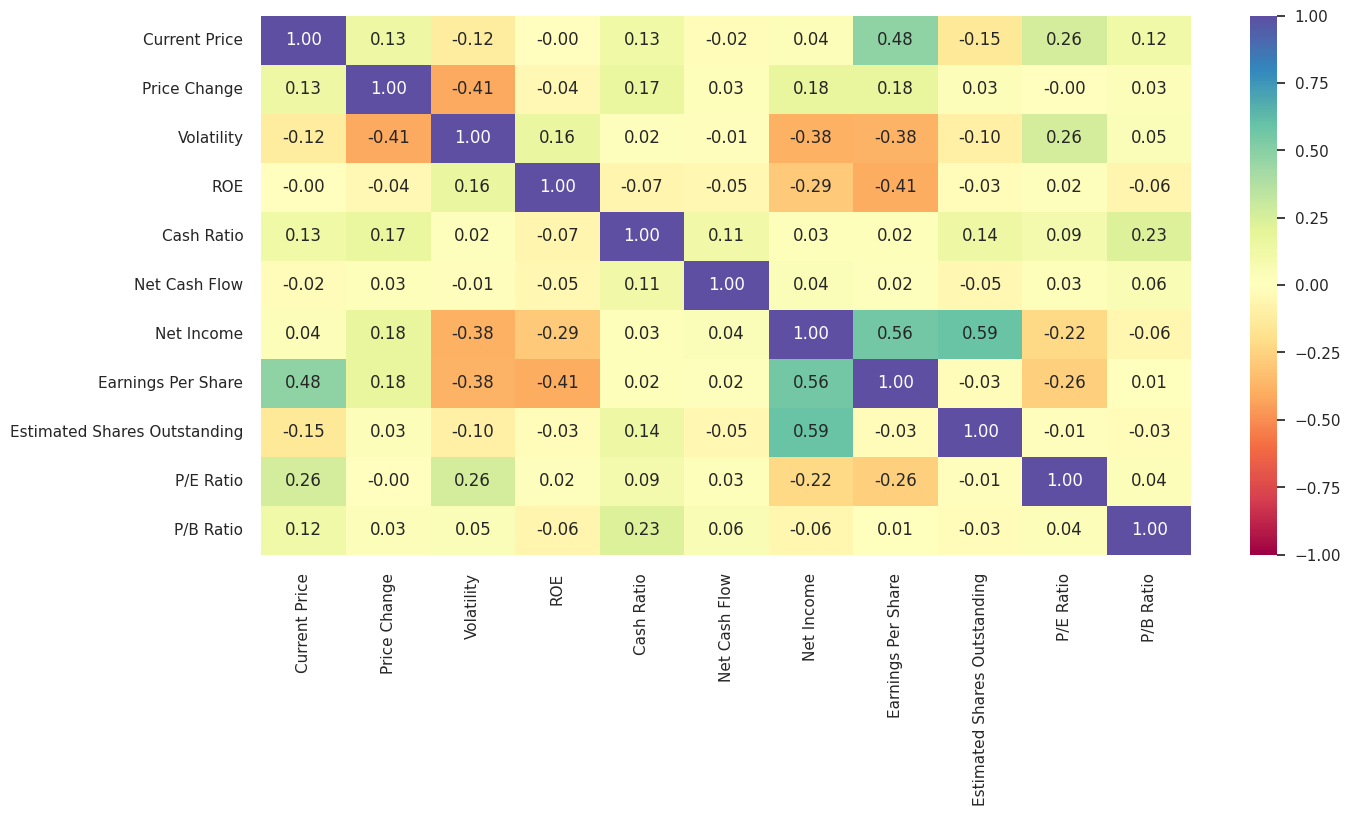

In [75]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations:

- There is no significant strong correlation among the numerical variables.

- The `Net Income` of a company exhibits a positive correlation with both `Earnings Per Share` (0.56) and `Estimated Shares Outstanding` (0.59). This relationship is logical since higher company earnings benefit shareholders, making the company more attractive to potential investors.

- The percentage of `Price Change` and `Volatility` are negatively correlated (-0.41), implying that when price volatility decreases, the percentage change in price tends to increase, and vice versa.

- The negative correlation of -0.41 between `ROE` and `Earnings Per Share` suggests that as a company's `ROE` decreases, its `Earnings Per Share` tends to increase, or vice versa, indicating a potential inverse relationship between these two financial metrics.

- The positive correlation of 0.48 between `Current Price` and `Earnings Per Share` indicates that as a company's current stock price increases, its `Earnings Per Share` also tends to rise, suggesting a potential relationship where higher stock prices are associated with more favorable earnings per share.

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

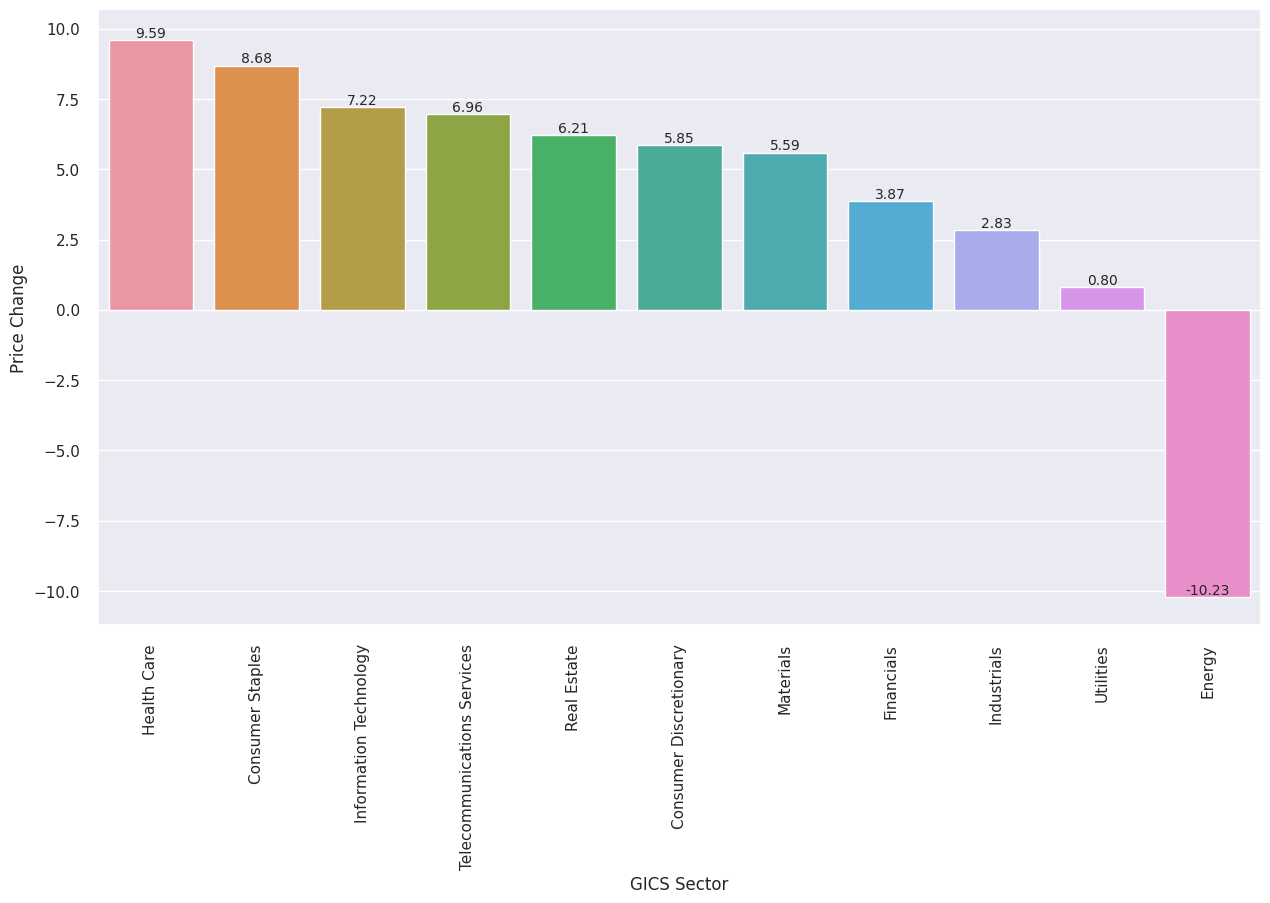

In [76]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False, order=df.groupby('GICS Sector')['Price Change'].mean().sort_values(ascending=False).index) #Show in descending order
plt.xticks(rotation=90)

# Adding labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()


Observations:
- On average, stocks within the Healthcare sector experienced the highest price increase, with 9.59% rise, while stocks in the Energy sector were the sole category to observe a decline in prices (-10.23%).

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

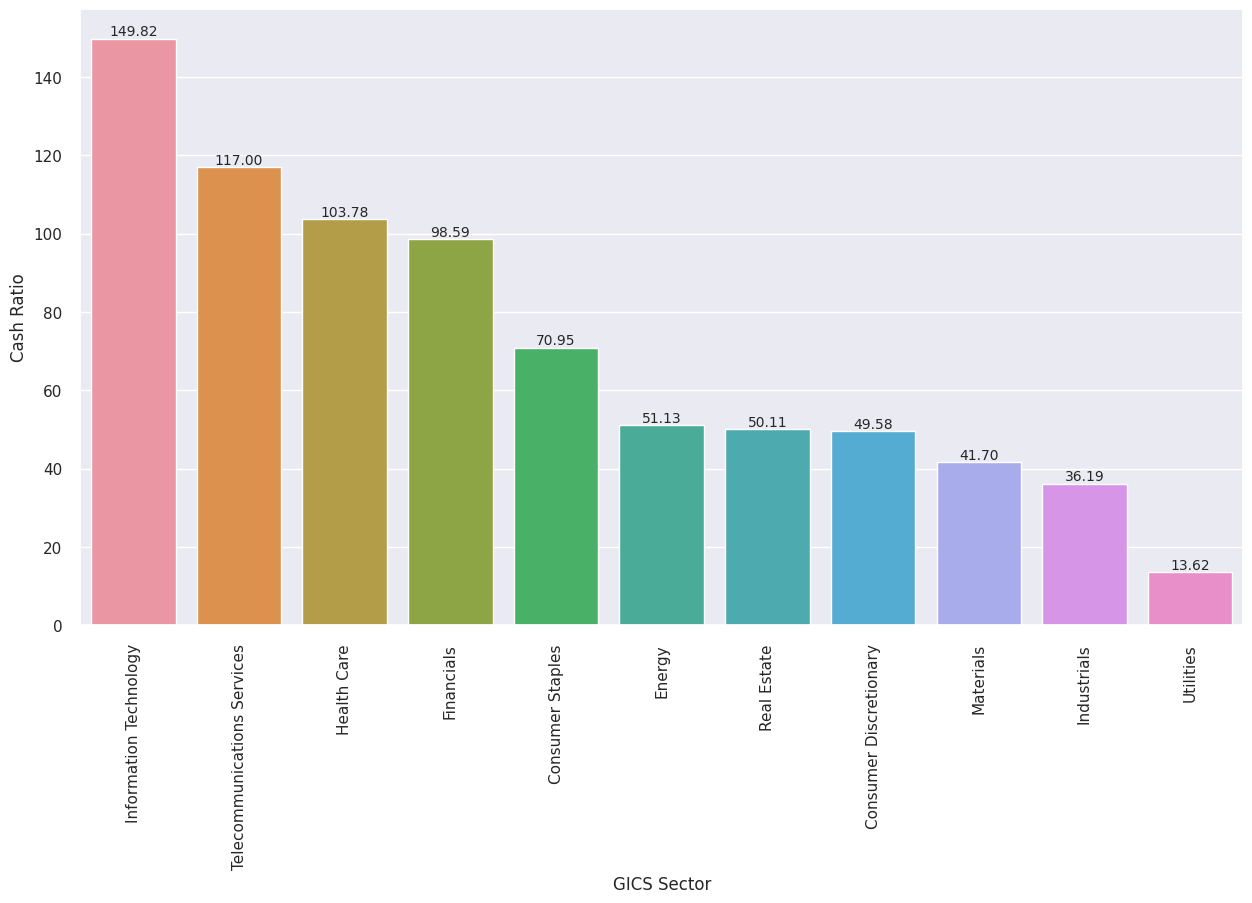

In [77]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False, order=df.groupby('GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False).index) #Show in descending order
plt.xticks(rotation=90)

# Adding labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

Observations:
- On average, companies in the Information Technology sector boast the highest cash ratio (149.82), indicating their greater likelihood to meet short-term obligations solely with cash and cash equivalents.
- In contrast, companies within the Utilities sector exhibit the lowest cash ratio on average (13.62), suggesting a lower capacity to cover short-term obligations using only cash and cash equivalents.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

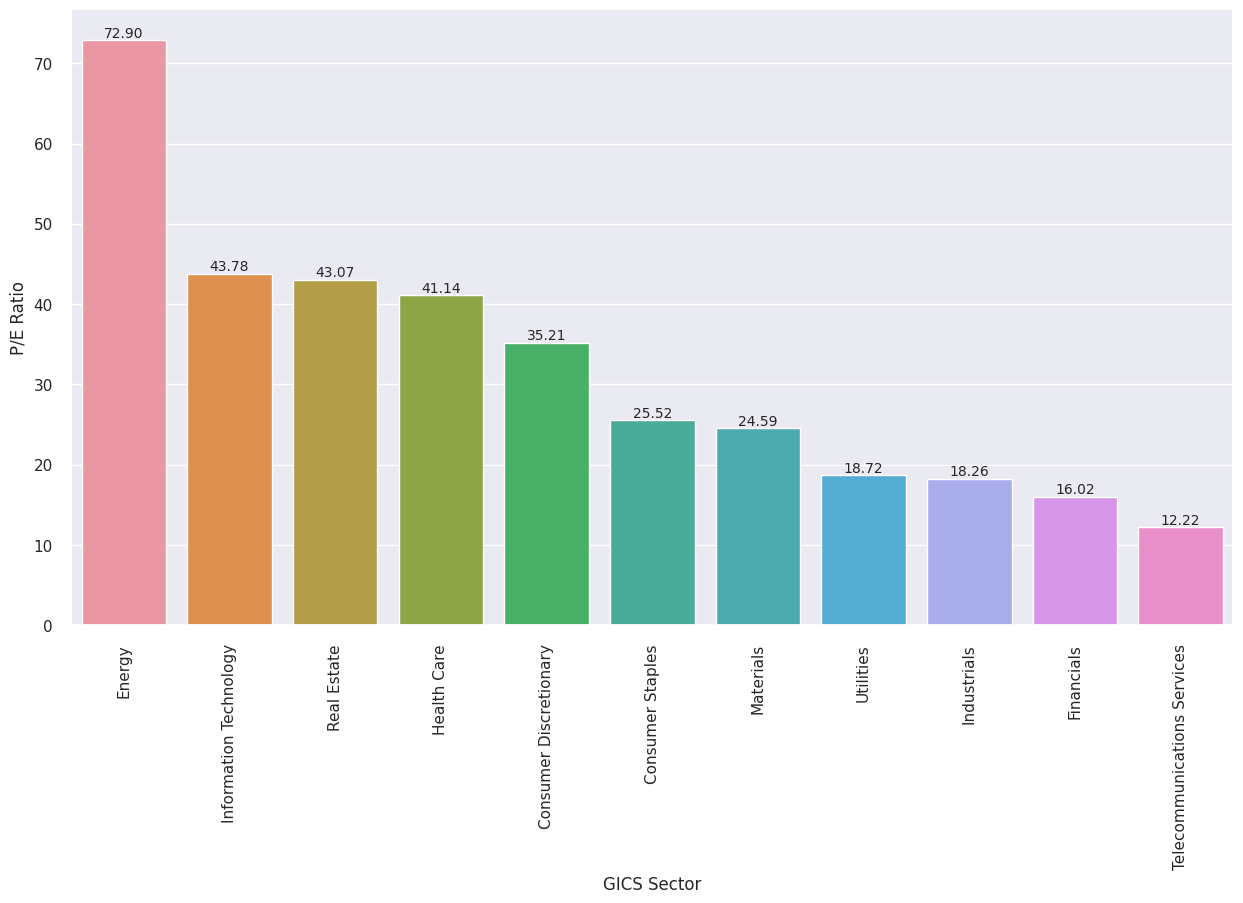

In [78]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False, order=df.groupby('GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False).index) #Show in descending order
plt.xticks(rotation=90)

# Adding labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

Observations:
- On average, Energy sector companies have the highest P/E ratio (72.9).
- The lowest amount belongs to Telecommunications Services with an average P/E ratio of 12.22.

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

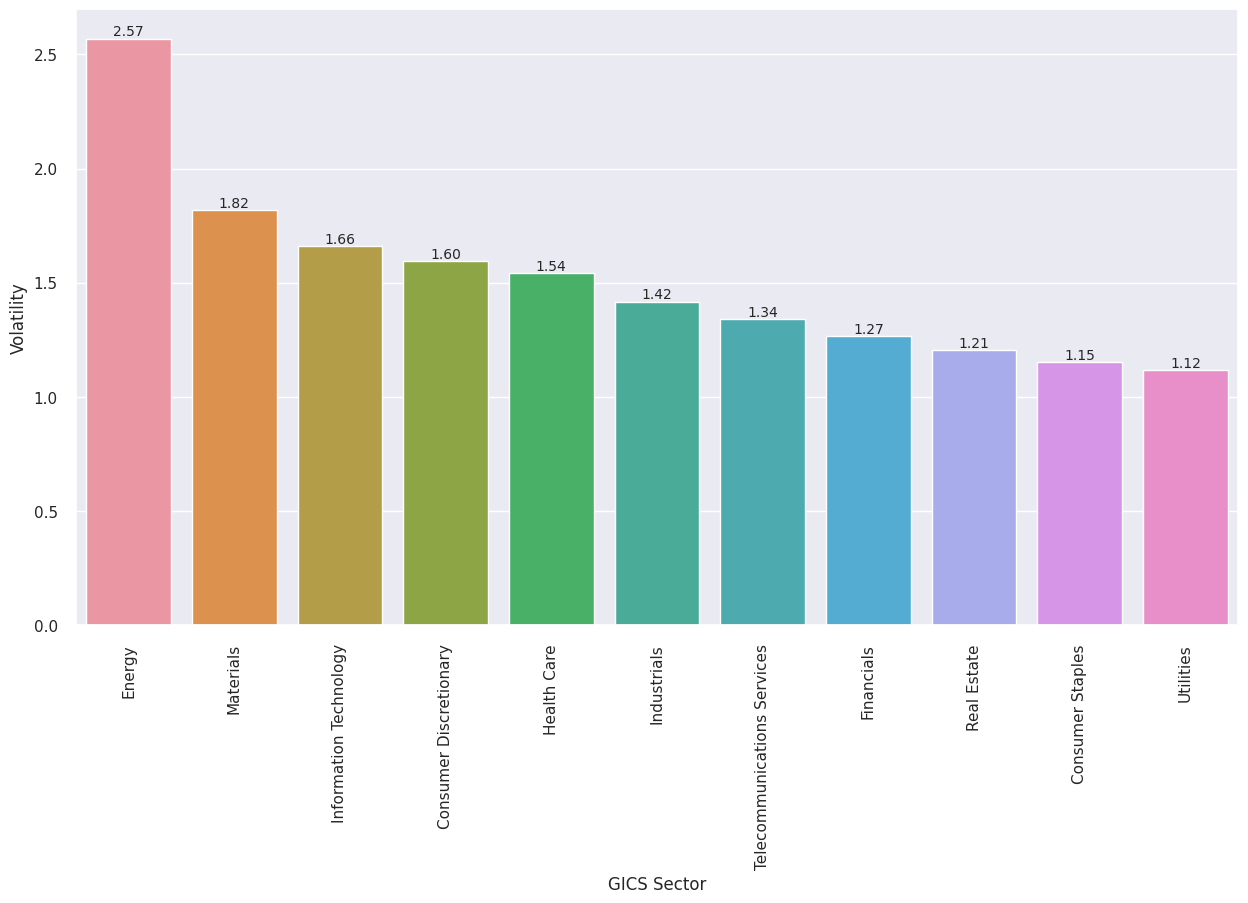

In [79]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False, order=df.groupby('GICS Sector')['Volatility'].mean().sort_values(ascending=False).index) #Show in descending order
plt.xticks(rotation=90)

# Adding labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

Observations:
- On average, stocks within the Energy sector shows highest volatility (2.57), which makes them riskier investment options.
- Conversely, stocks in the Consumer Staples (1.15) and Utilities (1.12) sectors tend to be less risky investments.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

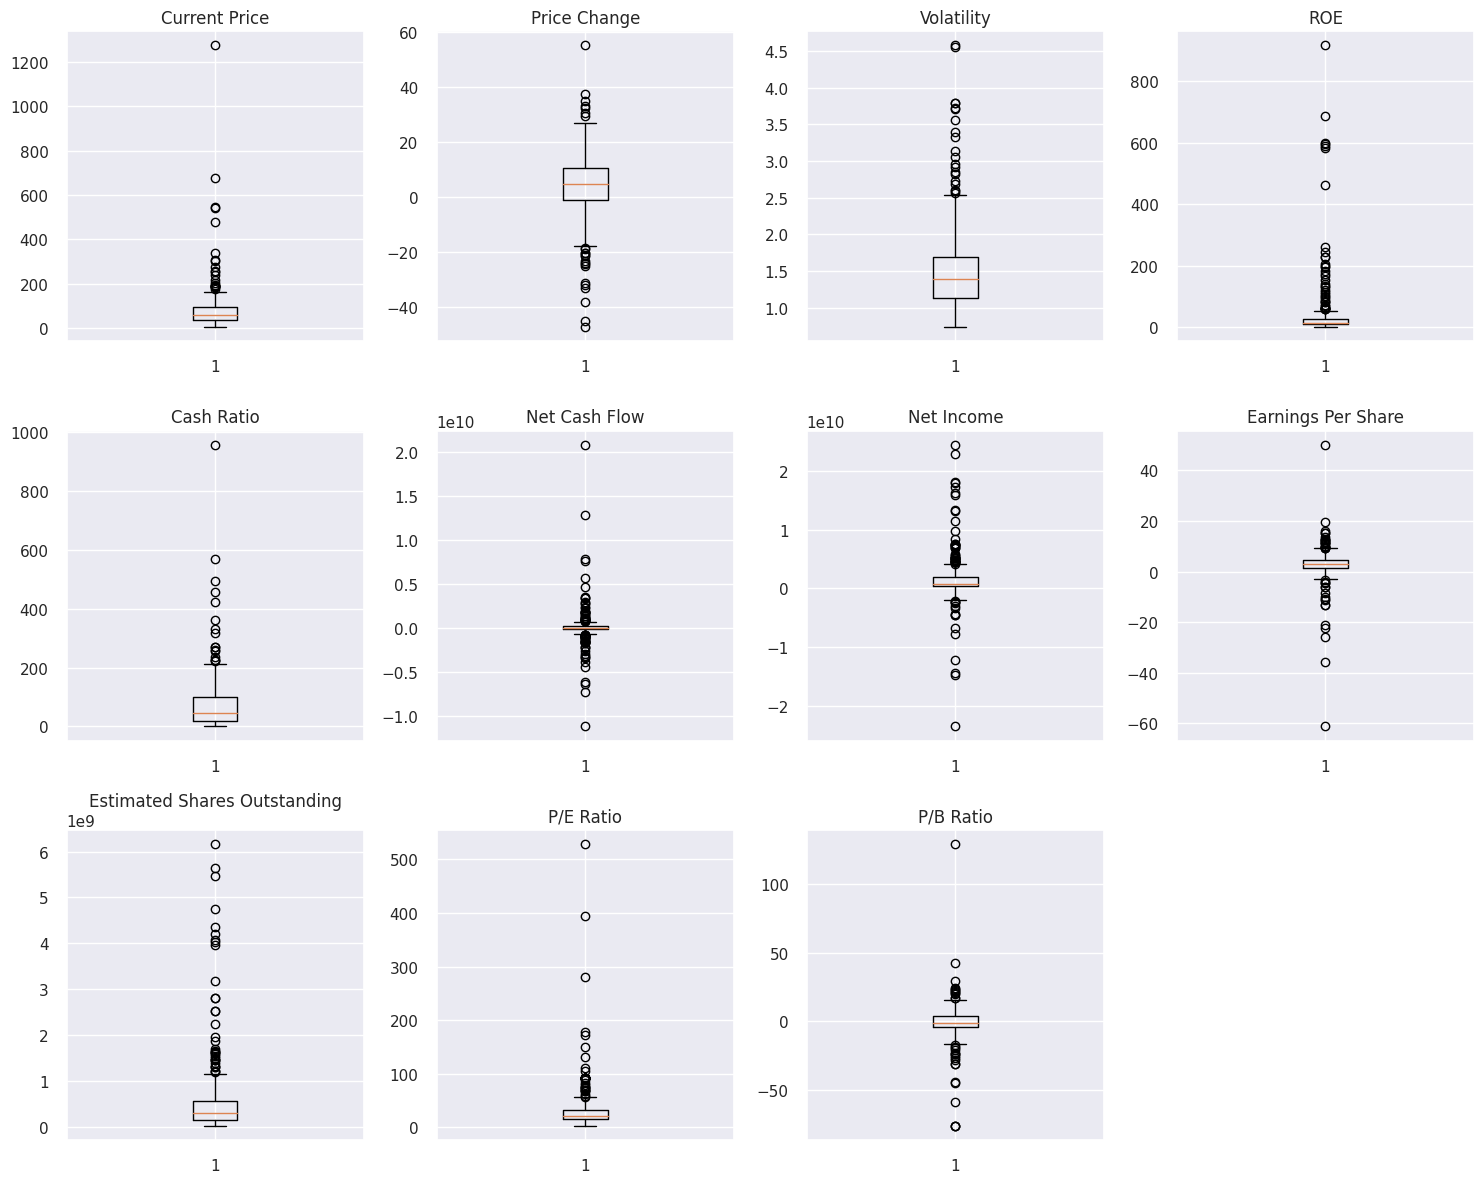

In [80]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- All variables in the data set have outliers.
- We will not treat them as they are proper values.

### Scaling

- Let's scale the data before we proceed with clustering.

In [81]:
#create list of columns with numerical variables
num_col = df.select_dtypes(include=np.number).columns.tolist()

# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [82]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

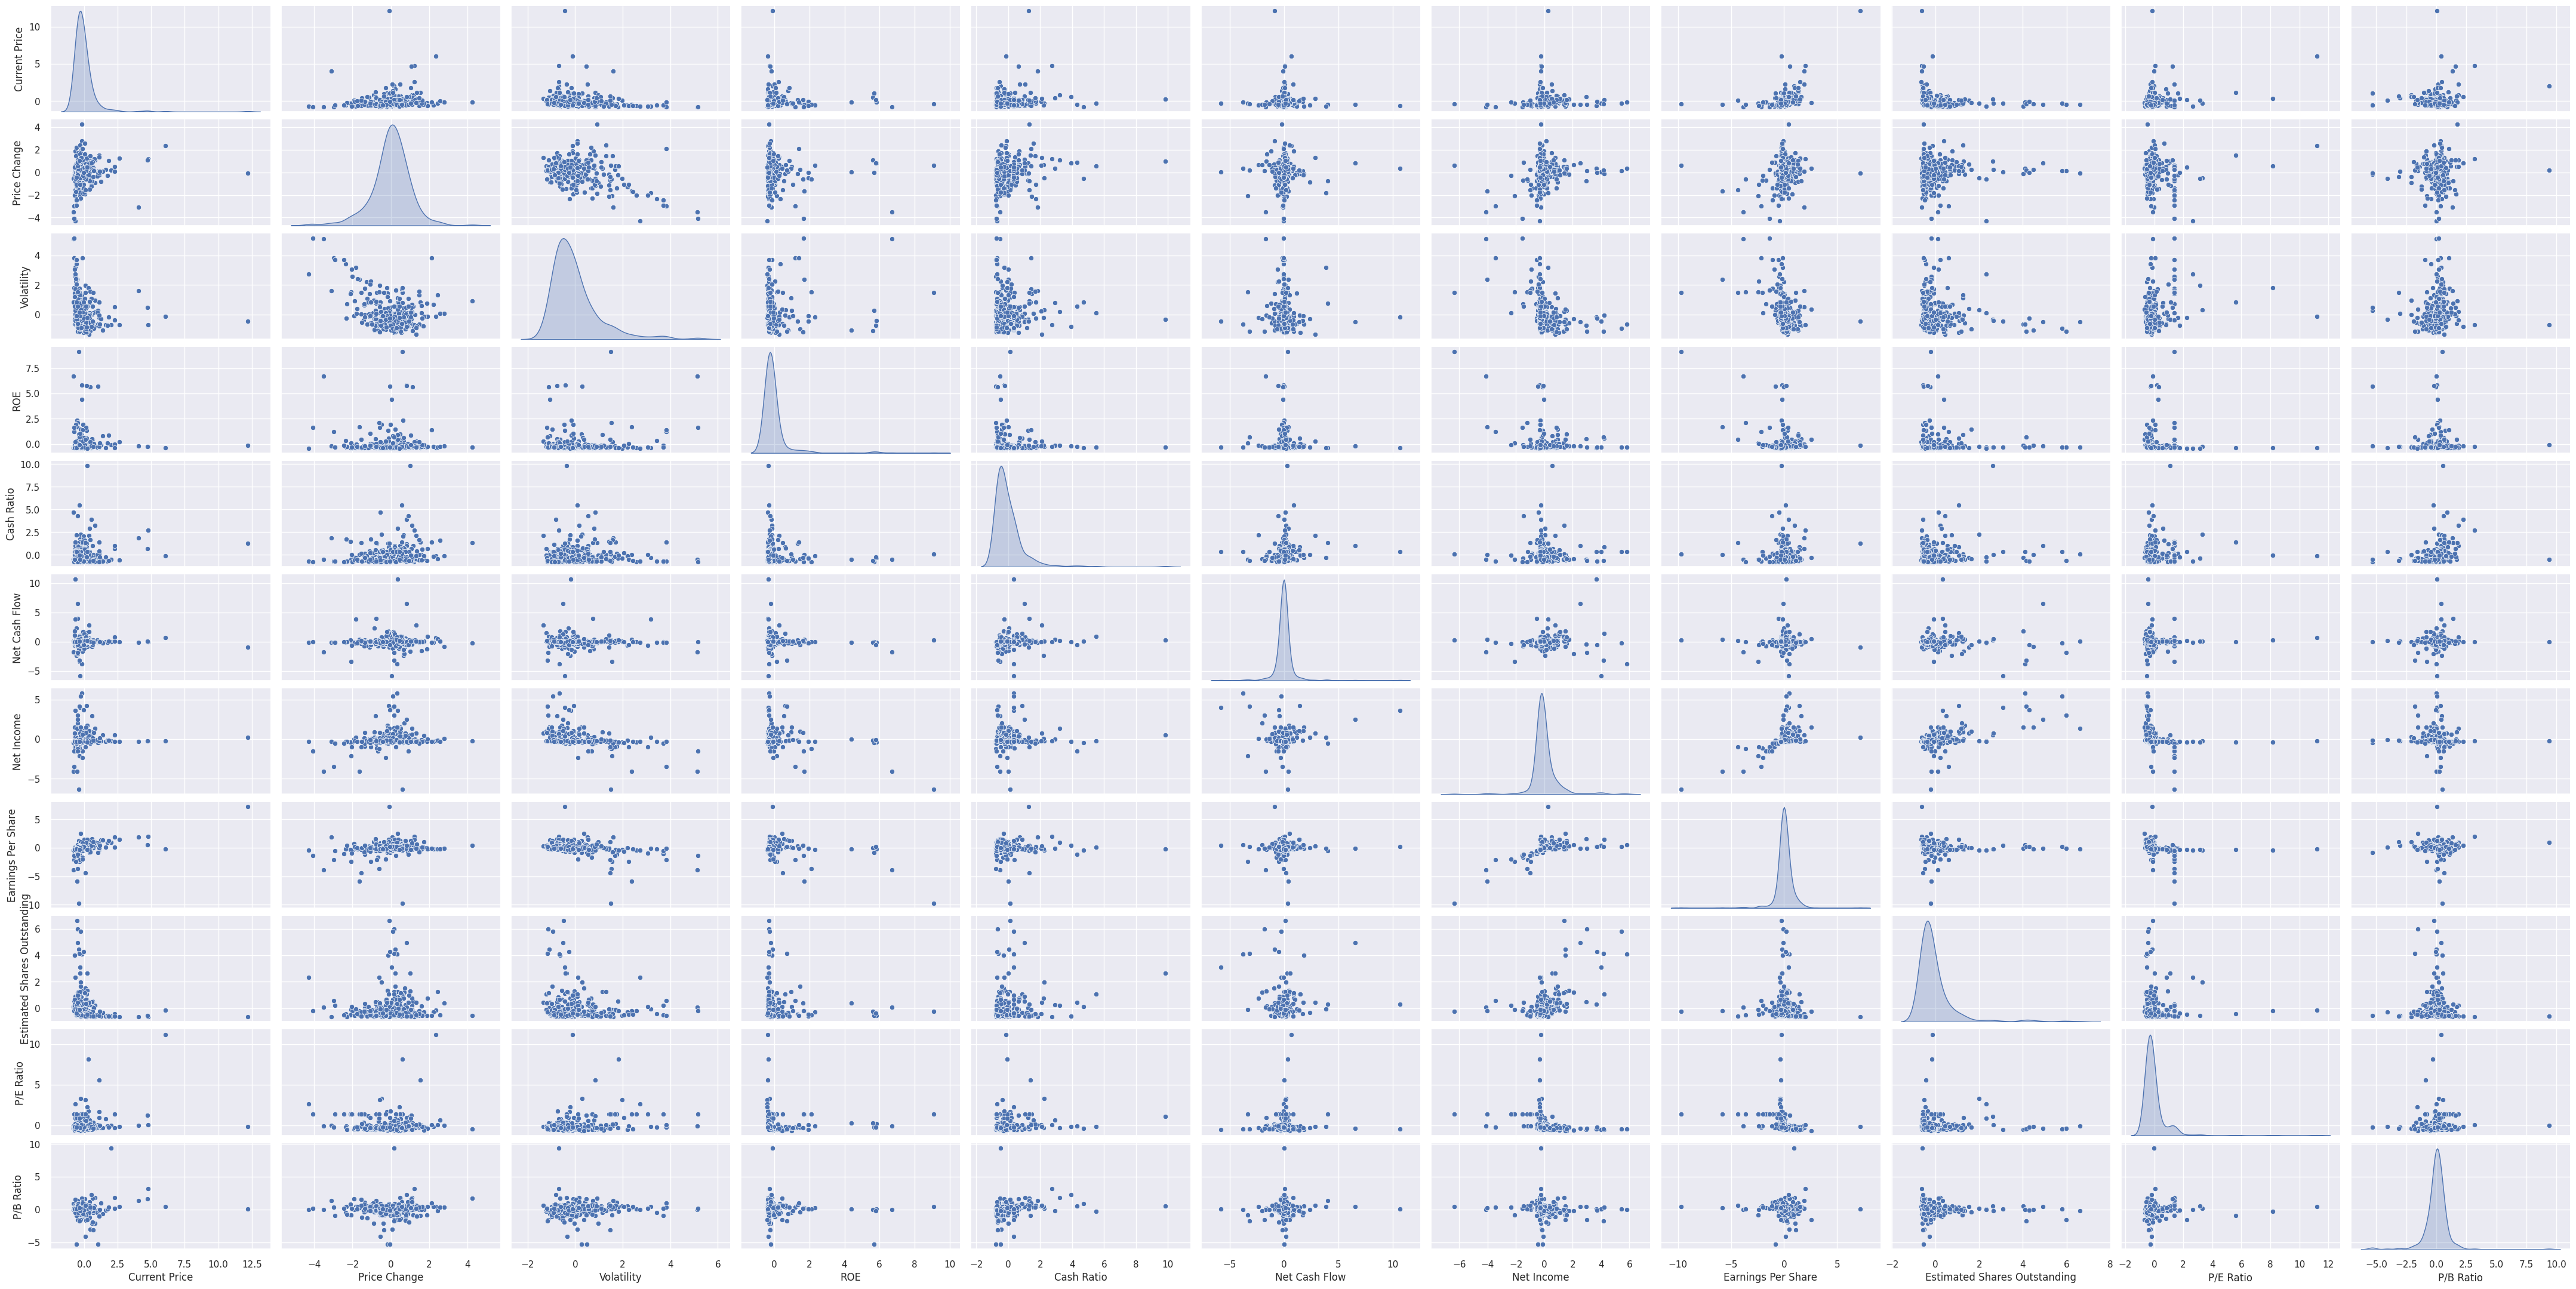

In [83]:
#create pairplot for scaled dataframe
sns.pairplot(subset_scaled_df, height=2,aspect=2 , diag_kind='kde')
plt.show()

Observations:
- After scaling the data, we notice that the distribution of each variable and the relationships between variables remain unchanged.
- All variables are now standardized to have a mean of 0 and a standard deviation of 1, ensuring that they are on a consistent scale.

## K-means Clustering

### Checking Elbow Plot

In [84]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


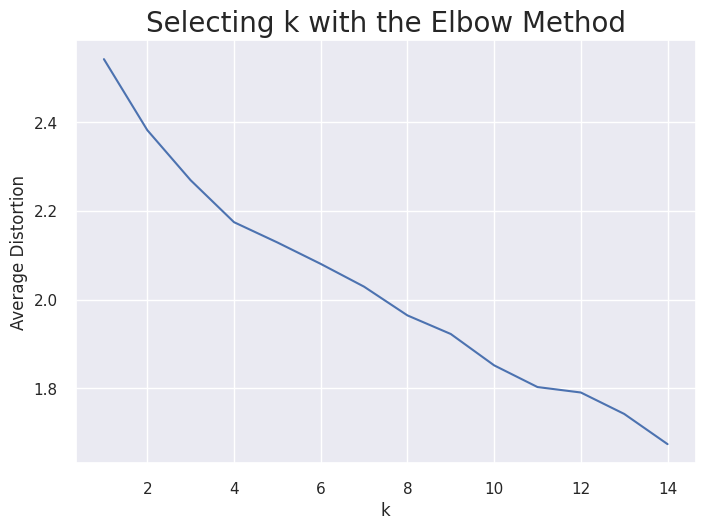

In [85]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

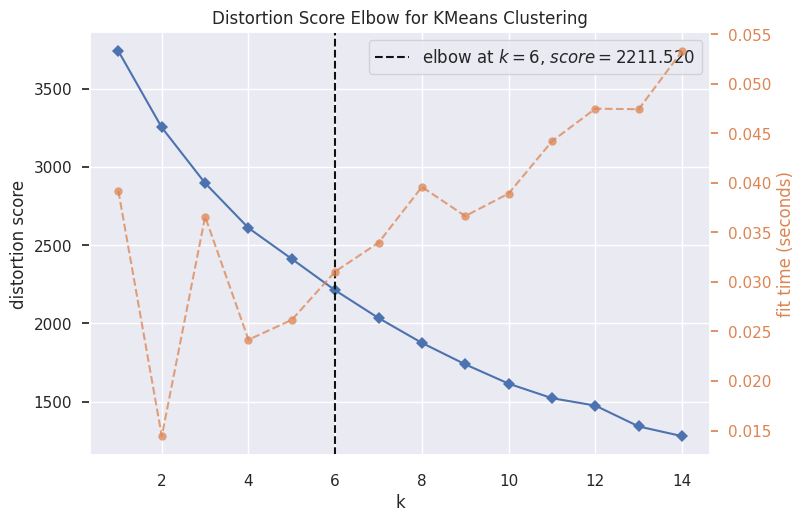

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [86]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


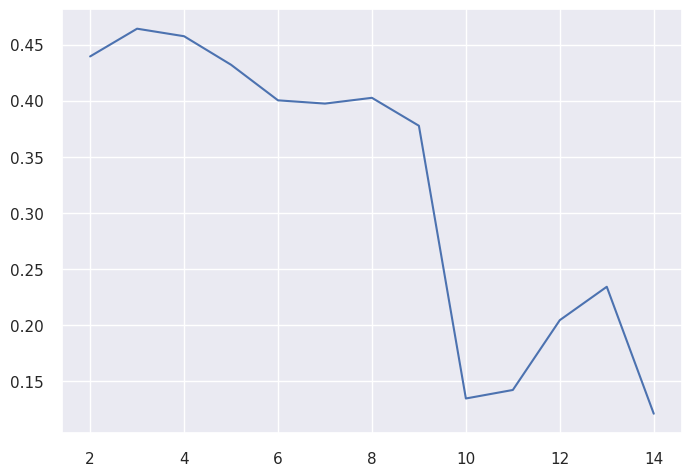

In [87]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

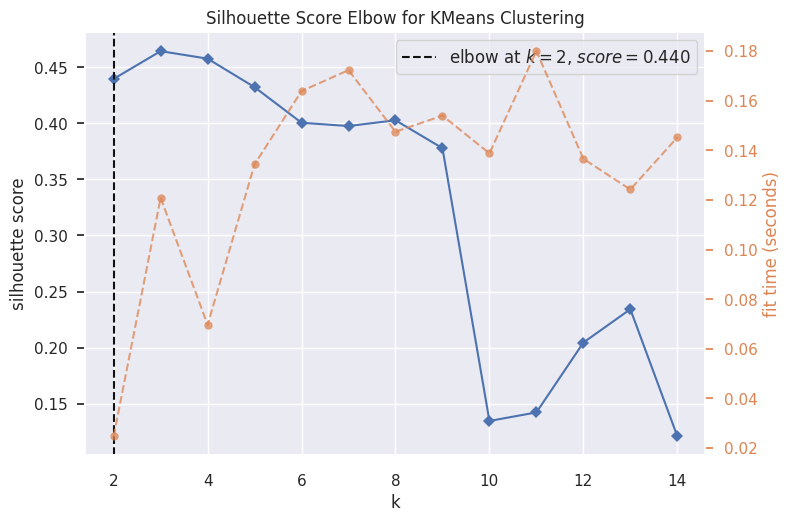

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [88]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

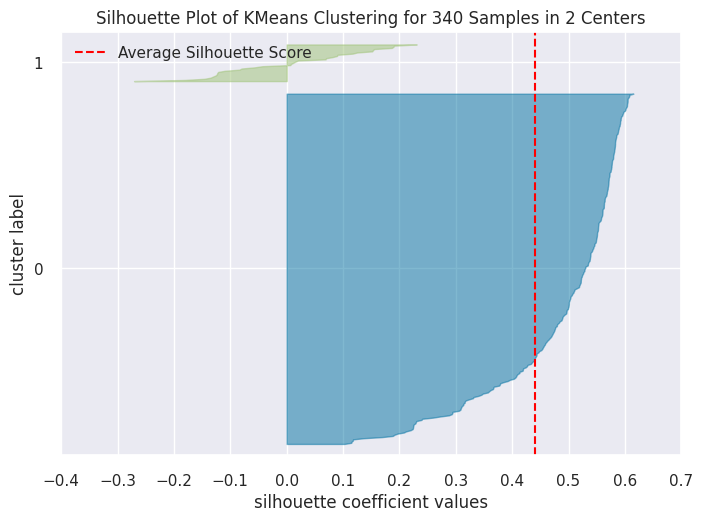

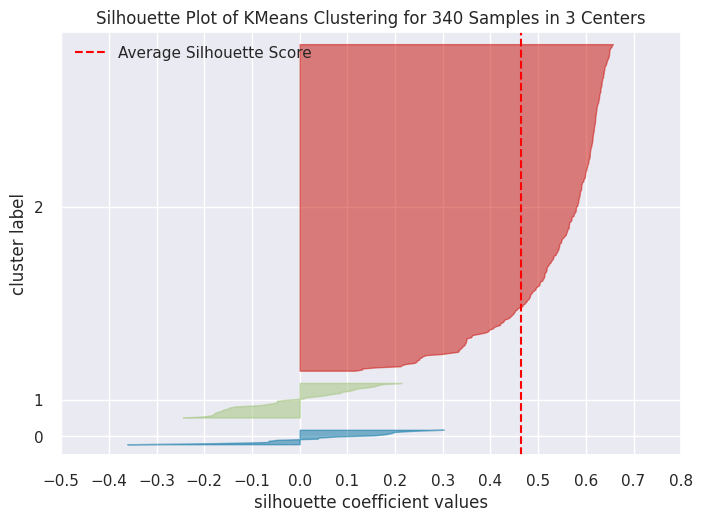

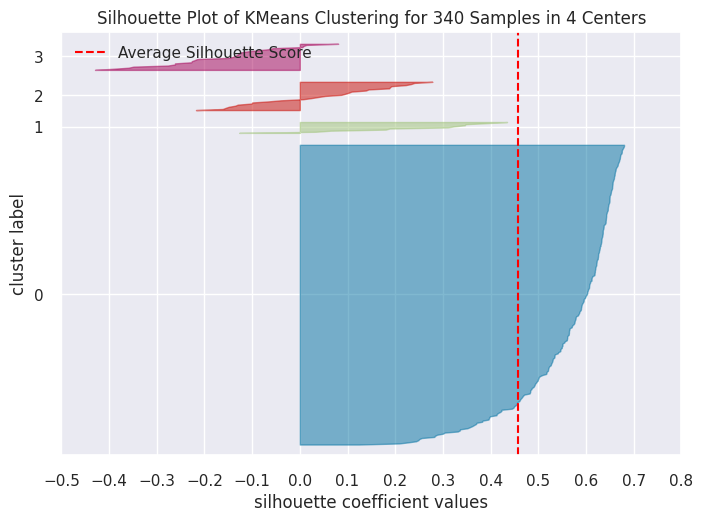

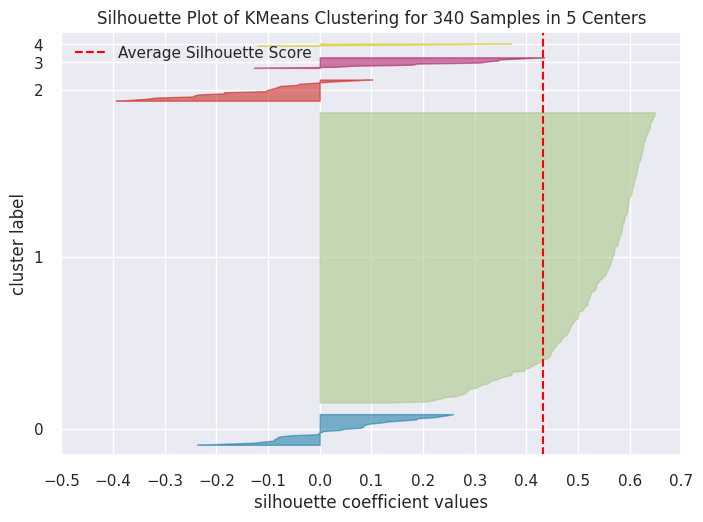

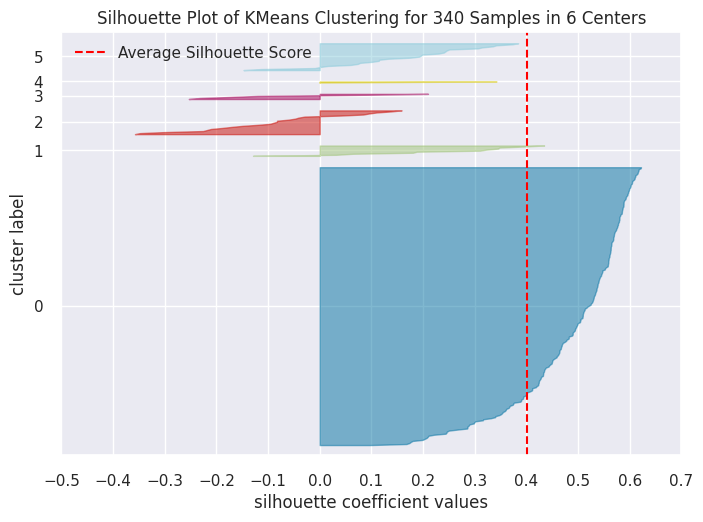

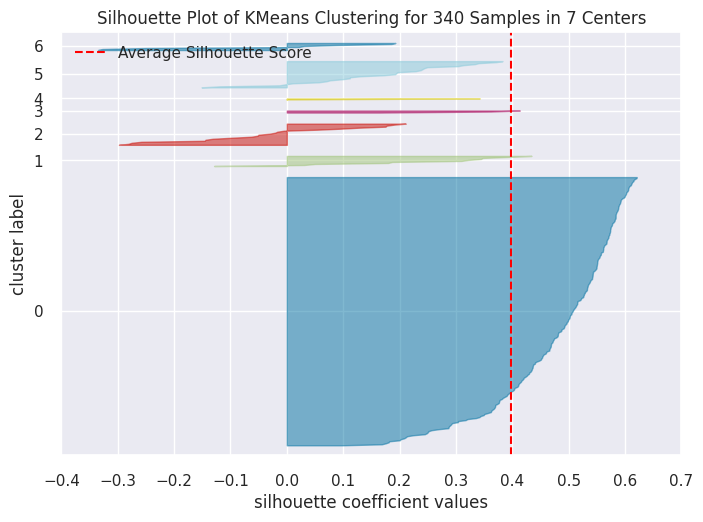

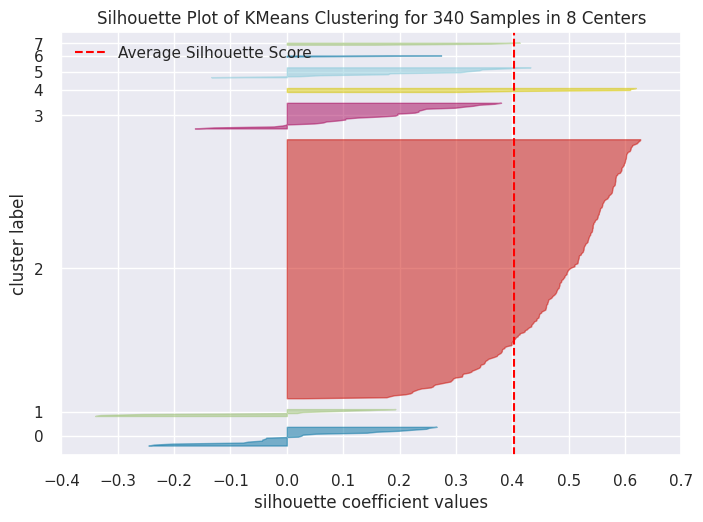

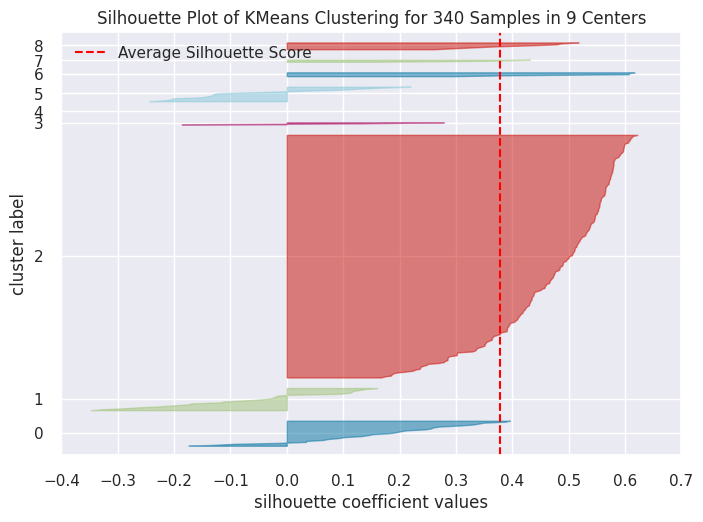

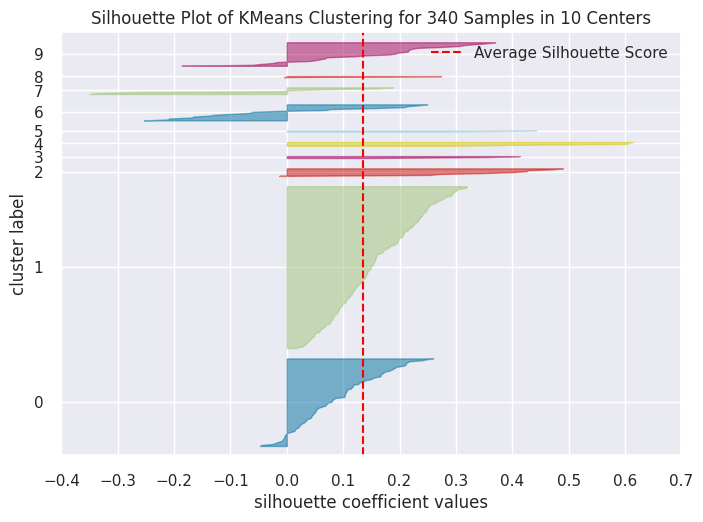

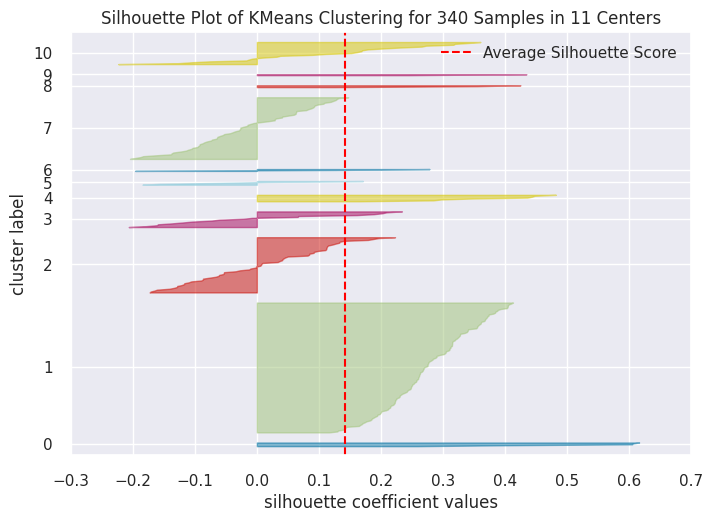

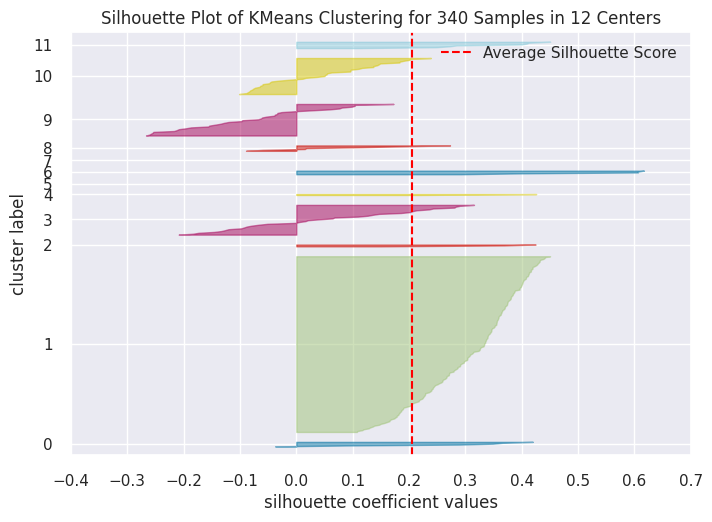

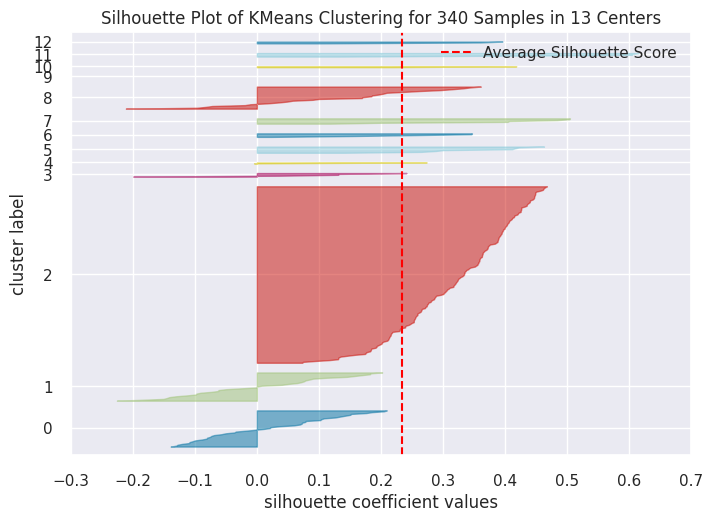

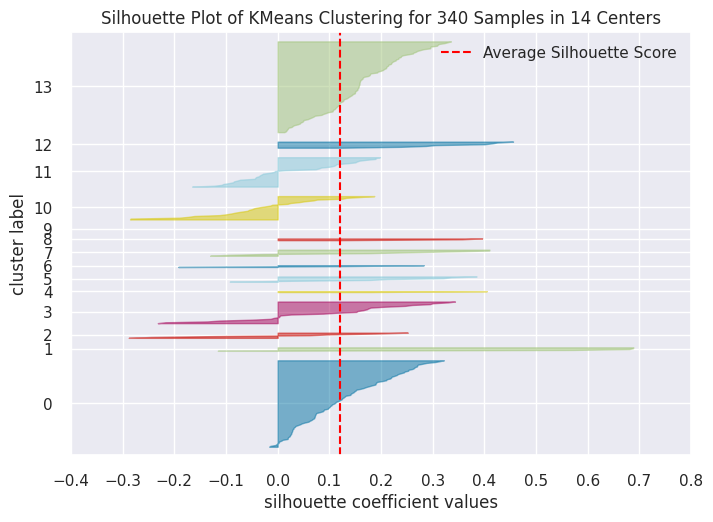

In [89]:
# finding optimal no. of clusters with silhouette coefficients
from yellowbrick.cluster import SilhouetteVisualizer

# Define the range of cluster numbers to visualize
cluster_range = range(2, 15)

for n_clusters in cluster_range:
    # Create a KMeans model with the current number of clusters
    model = KMeans(n_clusters=n_clusters, random_state=1)

    # Create a SilhouetteVisualizer with the KMeans model
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    # Fit and show the visualizer
    visualizer.fit(k_means_df)
    visualizer.show()


Observations:

- Upon analyzing the elbow plot and considering distortions, it appears that the best cluster choice is around 4, 5, and 6 clusters.

- Although a silhouette score of 3 cluster is the highest, it doesn't align well with the elbow plot, suggesting that it might not be the best choice.

- On the other hand, the silhouette scores for 5 and 6 clusters are not particularly impressive.

- Among the three options observed in the elbow plot (4, 5, and 6 clusters), **4 clusters** stands out with the best silhouette score, making it a favorable choice.

### Creating Final Model

In [90]:
# final K-means model
kmeans = KMeans(n_clusters=4, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [91]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [92]:
km_cluster_profile = df1.groupby("KM_segments").mean()  ## groupby the cluster labels

In [93]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values  ## groupby the cluster labels
)

In [94]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [95]:
## print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [96]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Energy                         22
             Industrials                     1
             Inform

In [101]:
pd.crosstab(df1['GICS Sector'], df1.KM_segments).style.highlight_max(color="lightgreen", axis=0)

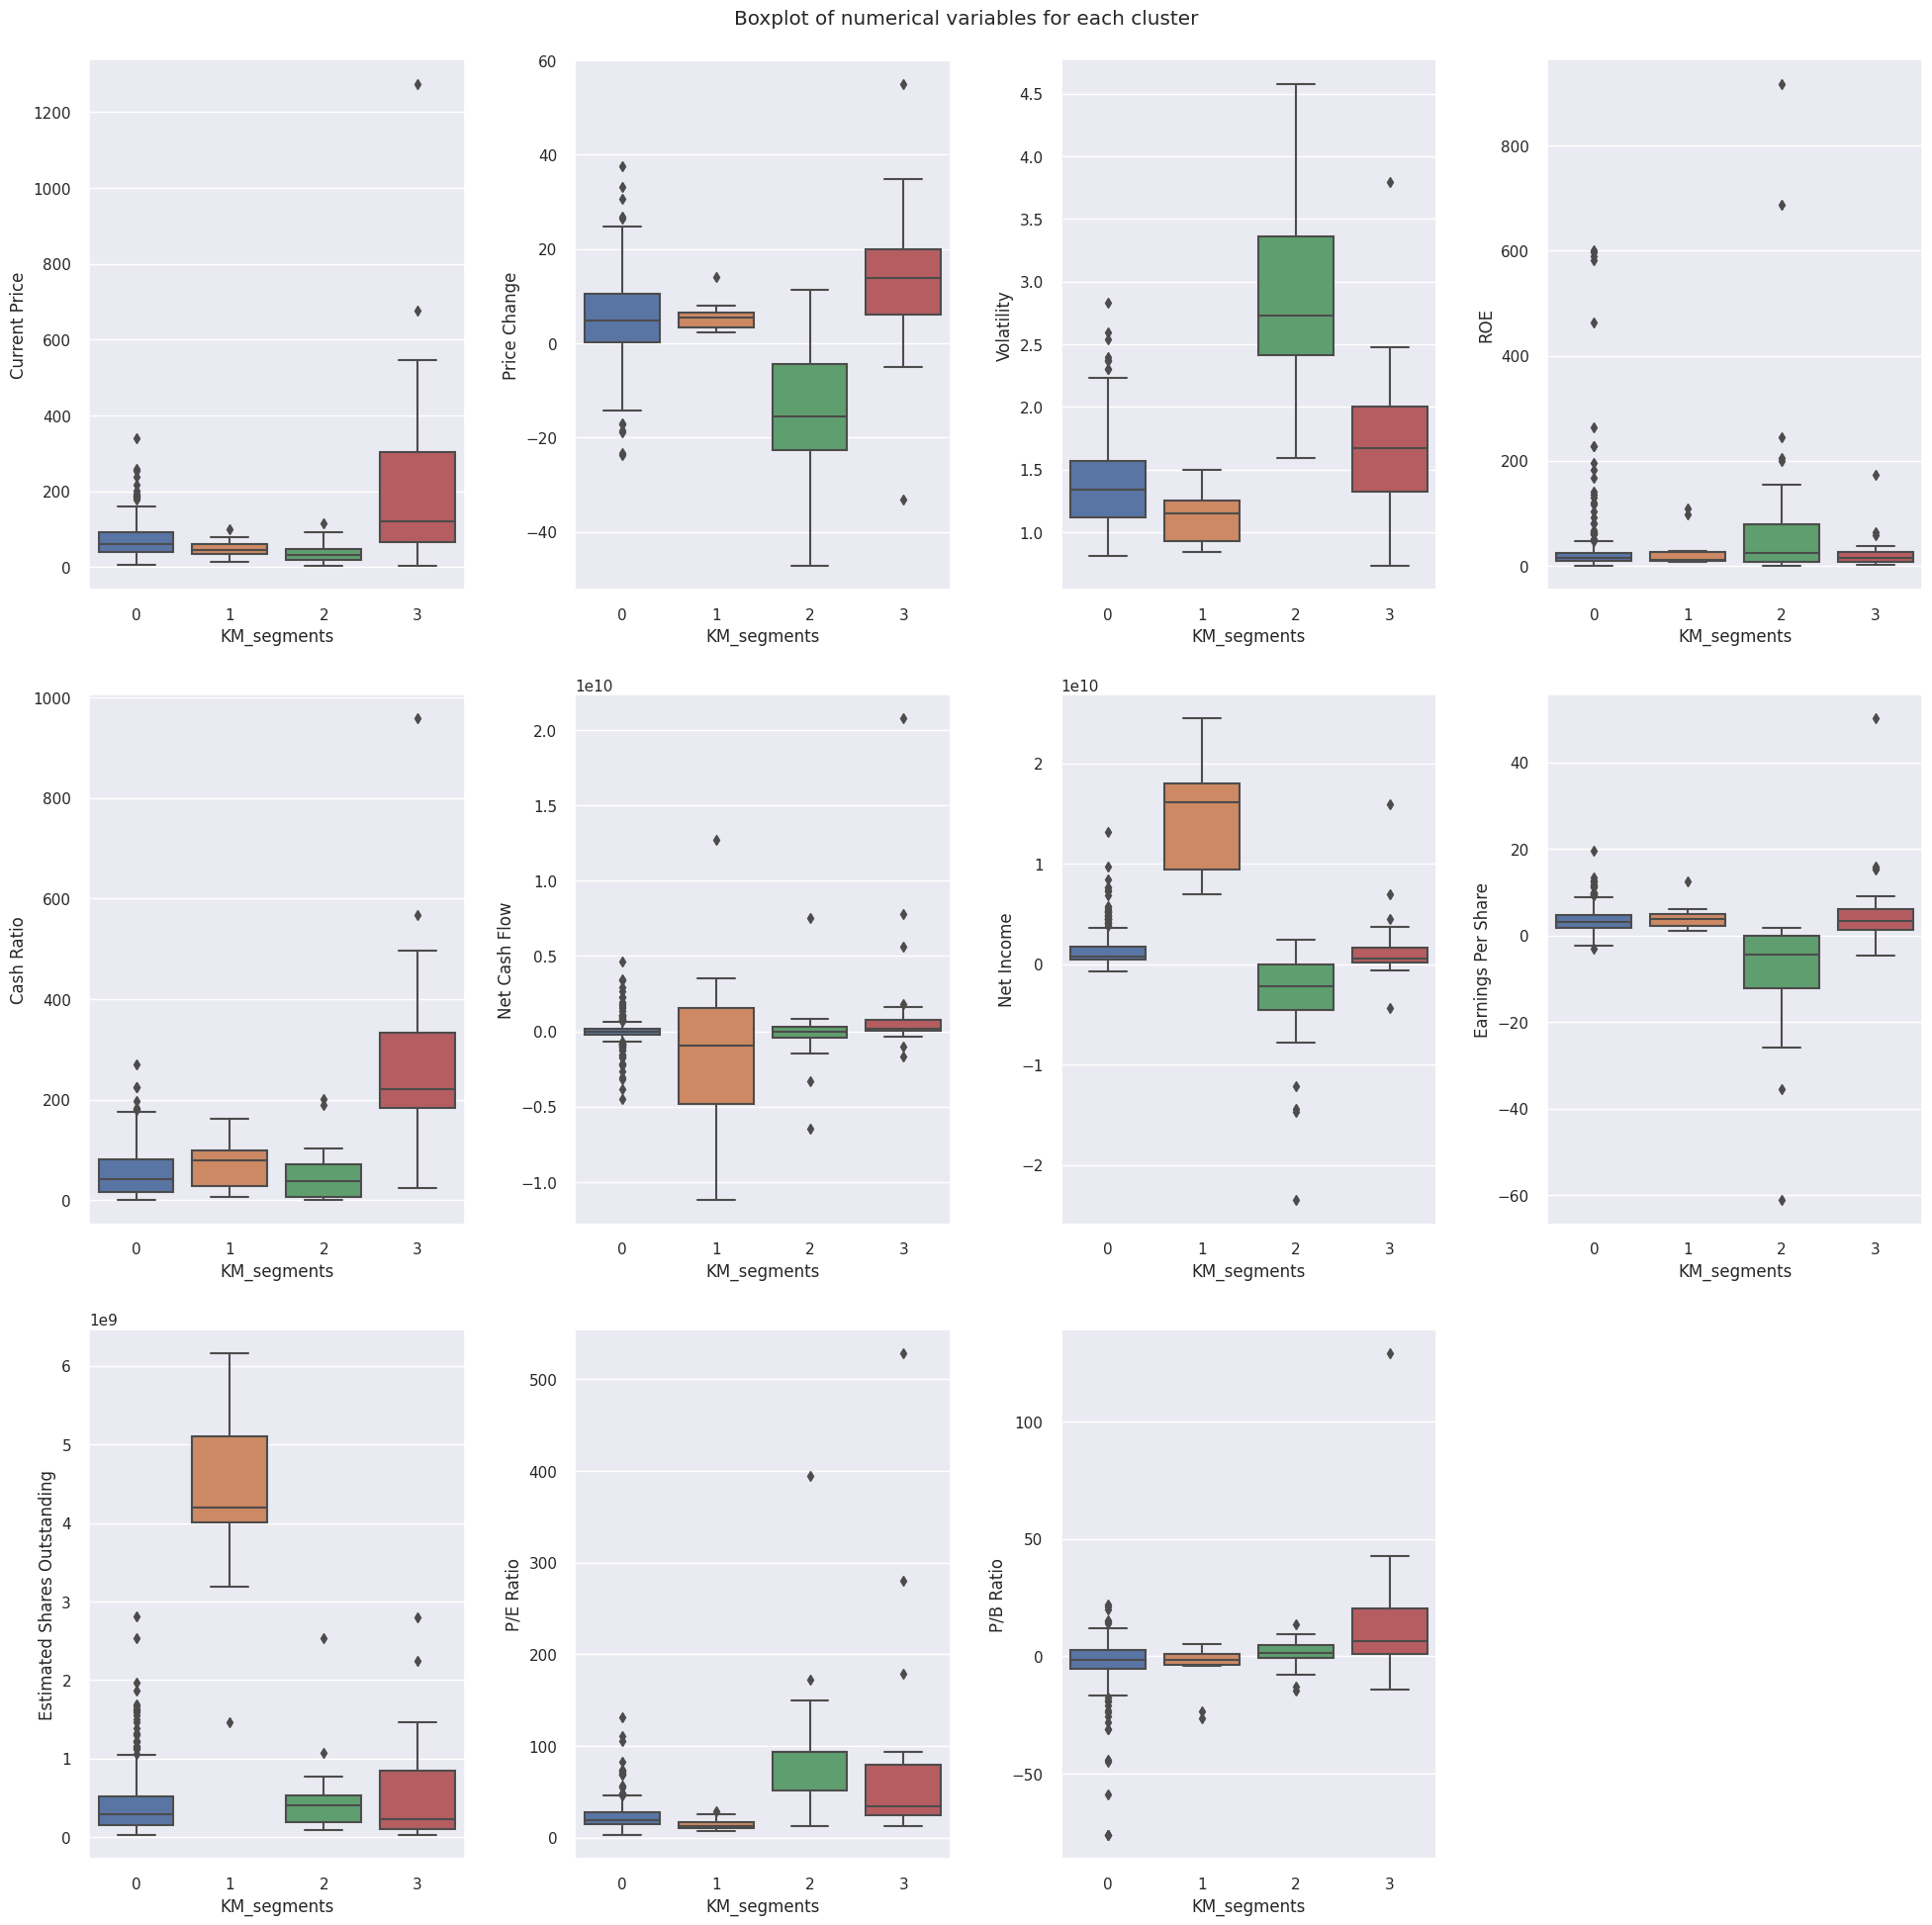

In [97]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='KM_segments'>

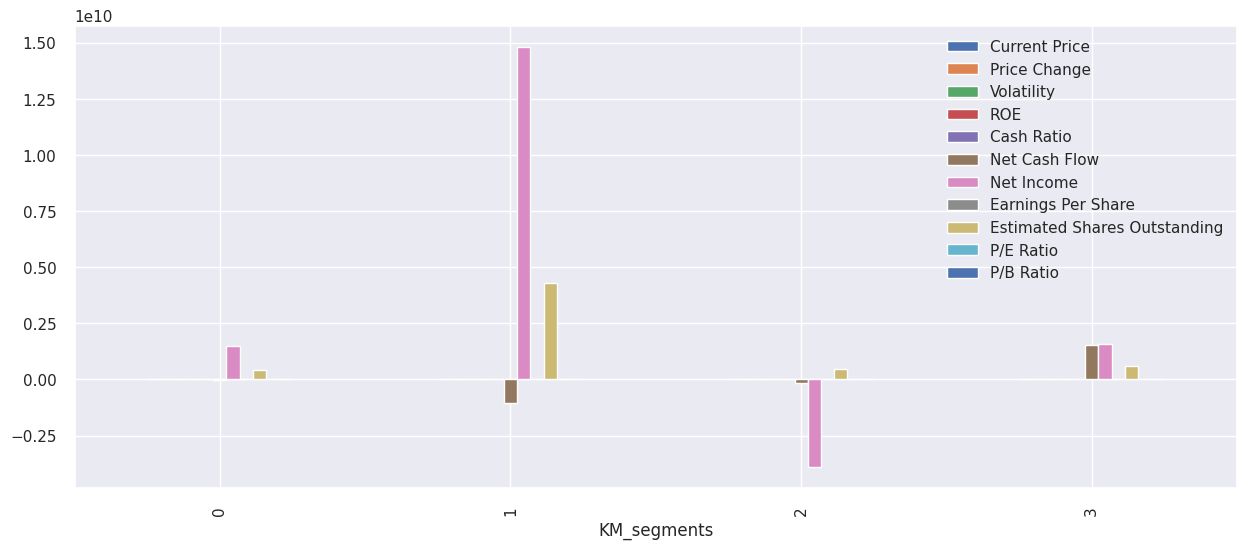

In [99]:
df1.groupby("KM_segments").mean().plot.bar(figsize=(15, 6))

### Insights

- **Cluster 0**: *The Balanced Performers*
  - There are 277 companies in this cluster, which is the highest number among 4 clusters.
  - The companies within this cluster have a moderate `Current Price`, `Price Change` and `Earnings Per Share`.
  - Companies in this cluster have a low `Cash Ratio`, `Net Income`, `Net Cash Flow`, `ROE`, `Volatility`, `P/E Ratio`, `Estimated Shares Outstanding`.
  - Investors looking for stability with a moderate risk profile might find these stocks appealing.

- **Cluster 1**: *The High Potential*
  - There are 11 companies in this cluster.
  - The companies within this cluster have the highest `Net Income` (14833090909.1), `Estimated Shares Outstanding` (4298826628.7) among 4 clusters.
  - The companies within this cluster have the lowest `P/B Ratio` (-4.55), `Volatility` (1.13), `Net Cash Flow` (-1072272727.3) and `P/E Ratio（14.8) among 4 clusters.
  - This cluster may represent high-potential companies, especially if the negative net cash flow is a temporary result of significant investments. They tend to have lower volatility and are likely small-cap stocks.

- **Cluster 2**: *The Risk Taker*
  - There are 27 companies in this cluster.
  - The companies within this cluster have the highest `Volatility` (2.9), `ROE`(107) and `P/E Ratio` (90.6) among 4 clusters.
  - The companies within this cluster have the lowest `Current Price` (38.1), `Price Change` (-15.4), `Cash Ratio` (50.0), `Net Income`(-3887457740.7) and `Earnings Per Share` (-9.5) among 4 clusters.
  - Investors considering Cluster 2 should be aware of the high risk associated with these companies due to their volatility and financial metrics. However, for those seeking potentially high returns and willing to tolerate higher risk, this cluster may offer intriguing investment opportunities.

- **Cluster 3**: *The High-Value Investors*
  - There are 25 companies in this cluster.
  - The companies within this cluster have the highest `Current Price` (234.2), `Price Change`(13.4), `Cash Ratio` (277.6), `Net Cash Flow` (1554926560), `Earnings Per Share` (6.05) and `P/B Ratio` (14.4) among 4 clusters.
  - The companies within this cluster have the lowest `ROE` (25.6) among 4 clusters.
  - Investors looking for high-value investments with strong financial metrics may find these companies appealing, although they should be aware of the comparatively lower return on equity.




## Hierarchical Clustering

### Computing Cophenetic Correlation

In [102]:
hc_df = subset_scaled_df.copy()

In [103]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] ## add distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

**As the highest cophenetic correlation is obtained with Euclidean distance, let's explore different linkage methods with Euclidean distance only.**

In [104]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

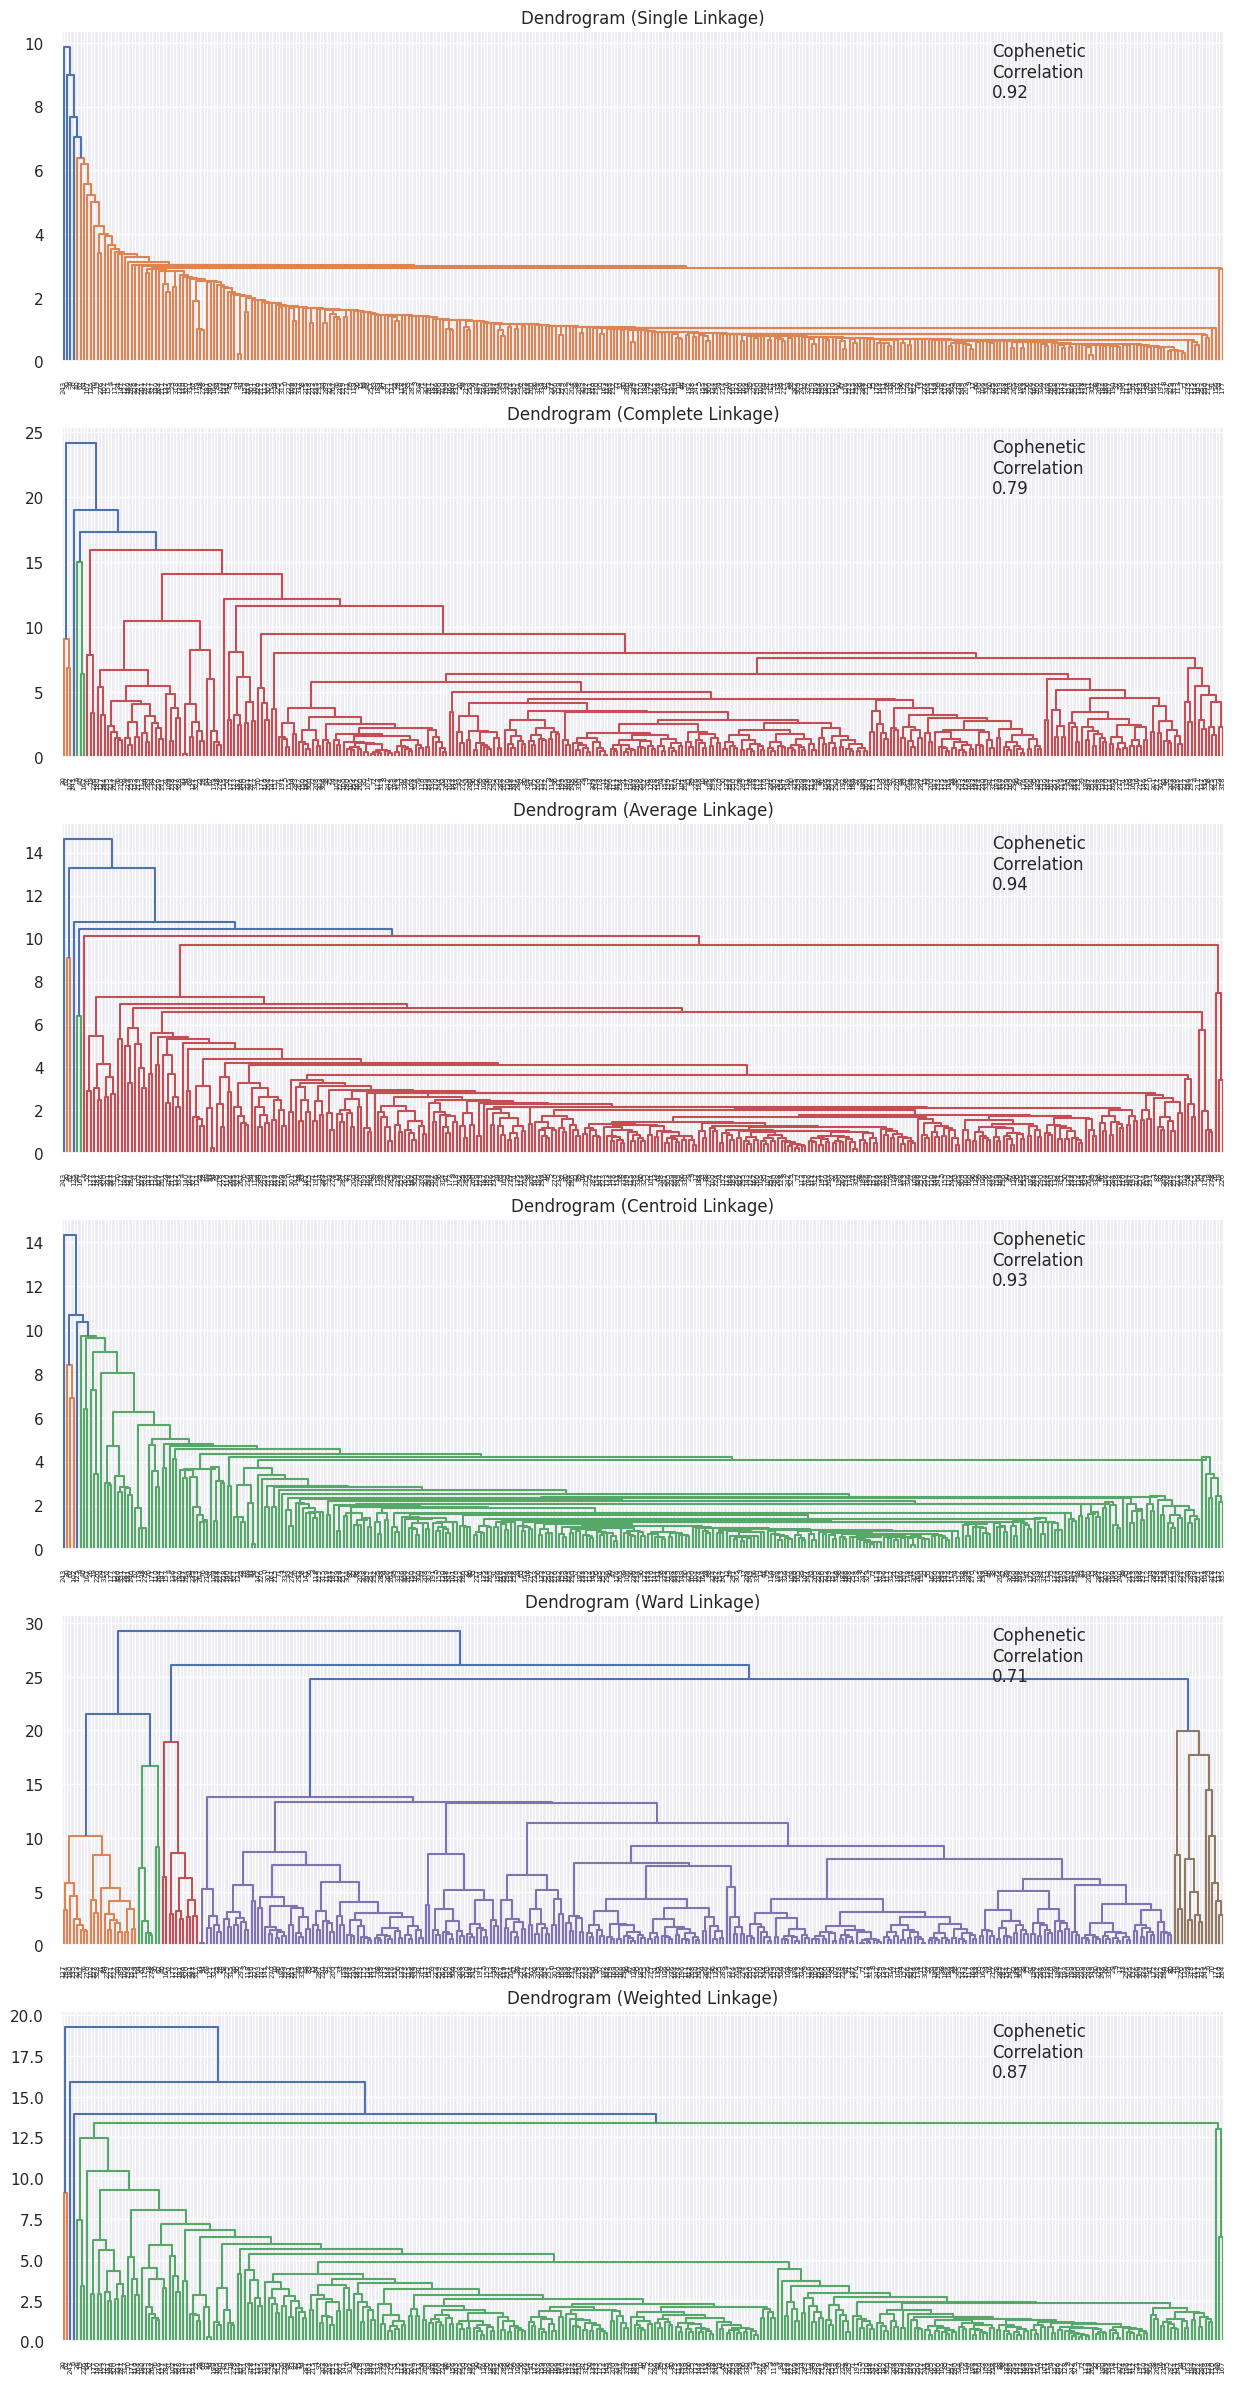

In [105]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

Observations:

- Although both the average and centroid linkages exhibited the highest cophenetic correlation, their clusters appeared somewhat more distinct compared to single, complete, and weighted linkages.

- Interestingly, the dendrogram generated by the ward linkage method displayed the most distinct clusters, despite having the lowest cophenetic correlation. It visually conveyed clearer boundaries between clusters than all other methods.

- Upon inspecting the dendrograms of the average and centroid linkages, it appears that having around 5 clusters would be a reasonable choice for partitioning the data effectively.

- Conversely, when examining the dendrogram produced by the ward linkage method, it suggests that opting for 4 clusters might yield more distinct and coherent groupings.

In [106]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Linkage  Cophenetic Coefficient
4      ward                0.710118
1  complete                0.787328
5  weighted                0.869378
0    single                0.923227
3  centroid                0.931401
2   average                0.942254

### Creating model using sklearn

Let's move ahead with 5 clusters, Euclidean distance, and average linkage.

In [112]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [113]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [114]:
hc_cluster_profile = df2.groupby("HC_segments").mean()  ## groupby the cluster labels

In [115]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [116]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [117]:
# let's see the names of the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New Y

Observations:
- The clusters are not well defined here.
- 4 out of the 5 clusters have a cluster size of less than 3 securities, which is not good for analysis.
- Hence, we will explore the ward clustering option below.

- We will try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be a good number of clusters from the dendrogram for Ward linkage.

In [118]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [119]:
# creating a copy of the original data
df3 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df3["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [120]:
hc_cluster_profile = df3.groupby("HC_segments").mean()

In [121]:
hc_cluster_profile["count_in_each_segment"] = (
    df3.groupby("HC_segments")["Security"].count().values
)

In [122]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [128]:
#grouping the GICS sectors based on the clusters
df3.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                2
             Energy                         22
             Financials                      1
             Industrials                     1
             Information Technology          1
             Materials                       1
1            Consumer Discretionary          5
             Consumer Staples                1
             Financials                      1
             Health Care                     8
             Information Technology          9
             Materials                       1
             Real Estate                     1
             Telecommunications Services     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Teleco

In [127]:
#Viewing the maximum sector in each cluster
pd.crosstab(df3['GICS Sector'], df3.HC_segments).style.highlight_max(color="lightgreen", axis=0)

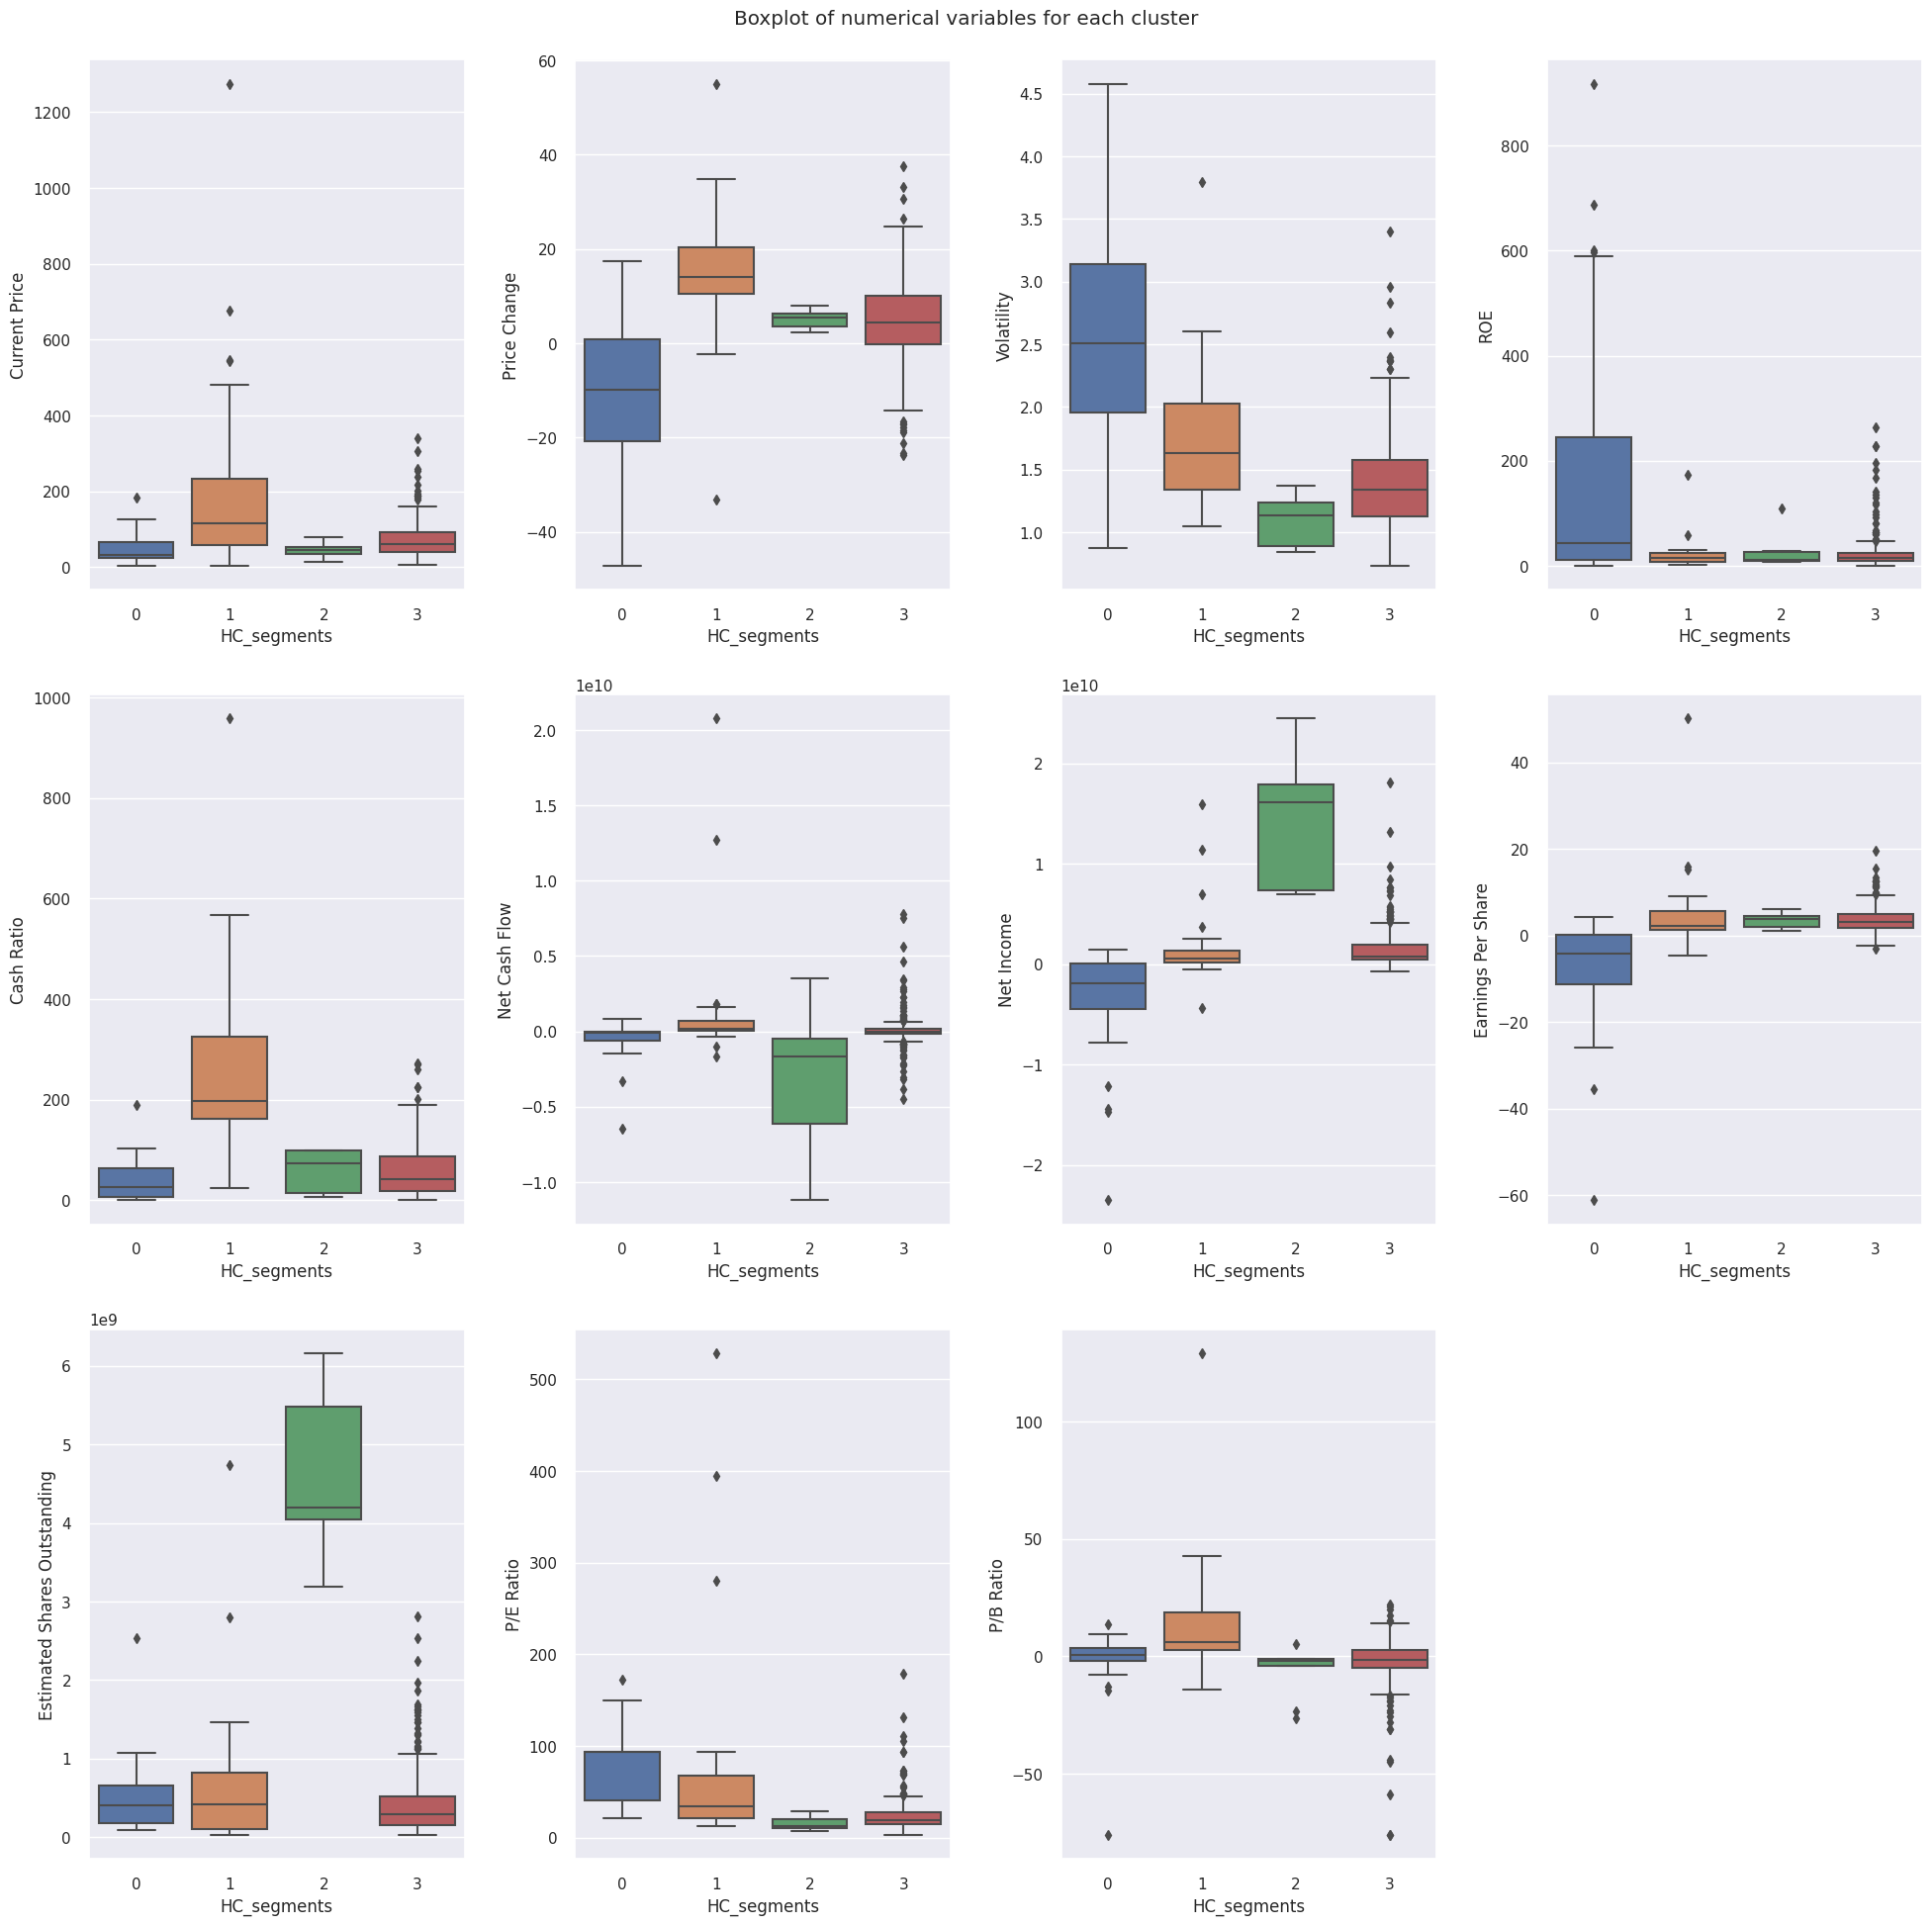

In [123]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df3, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

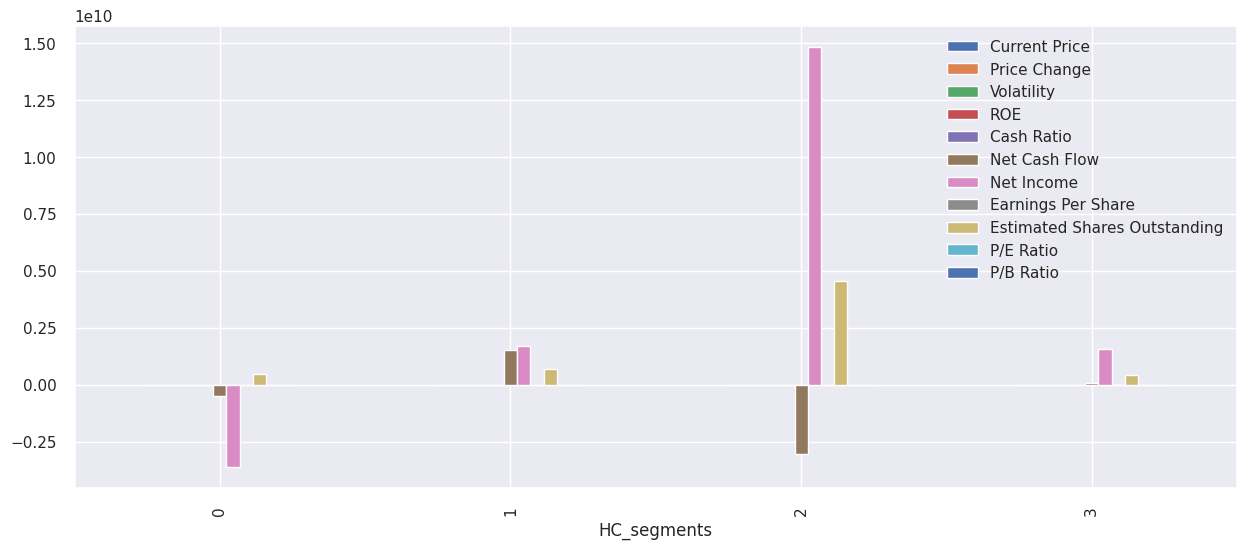

In [125]:
#Plotting a barplot for the means of each cluster
df3.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))
plt.show();

## Insights

- **Cluster 0**: *The High Risk-High Reward*
  - There are 29 companies in this cluster.
  - The companies within this cluster have the highest `Volatility` (2.6), `ROE` (196.6) among 4 clusters.
  - The companies within this cluster have the lowest `Price Change` (-11.3), `Cash Ratio` (40.3), `Net Income` (-3597244655.2) and `Earnings Per Share` (-8.7) among 4 clusters.
  - Investors considering Cluster 0 should be aware of the inherent high risk associated with these companies, but they also present the potential for substantial rewards due to their volatility and strong return on equity.

- **Cluster 1**: *The Sturdy Performers*
  - There are 27 companies in this cluster.
  - The companies within this cluster have the highest `Current Price` (213.5) `Price Change` (15.3), `Cash Ratio` (258.7), `Net Cash Flow` (1504052814.8), `Earnings Per Share` (5.2), `P/E Ratio` (78.4), `P/B Ratio`(13.0) among 4 clusters.
  - The companies within this cluster have the lowest `ROE` (22.3) among 4 clusters.
  - Investors exploring Cluster 1 may find these companies appealing for their robust financial metrics and stable performance, even though their return on equity is relatively modest.

- **Cluster 2**: *The Financial Titans*
  - There are 9 companies in this cluster.
  - The companies within this cluster have the highest `Net Income` (14848444444), `Estimated Shares Outstanding` (4564959946) among 4 clusters.
  - The companies within this cluster have the lowest `Current Price` (46.7), `Volatility` (1.08), `Net Cash Flow` (-3040666666.7),  `Earnings Per Share` (3.4), `P/E Ratio` (15.6) and `P/B Ratio` (-6.4) among 4 clusters.
  - Investors considering Cluster 2 should be aware that these companies are characterized by their substantial net income and shares outstanding, but they may face financial challenges, as indicated by their lower stock prices and negative net cash flow.

- **Cluster 3**: *The Steady Performers*
  - There are 275 companies in this cluster.
  - The companies within this cluster have the lowest `Price Change` (4.6), `Estimated Shares Outstanding` (445003946) among 4 clusters.
  - The performance of `Volatility`, `Cash Ratio`, `Net Cash Flow` and other aspects are moderate compared to other clusters.
  - Investors considering Cluster 3 may find these companies appealing for their steady performance, low price volatility, and conservative ownership structure.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

**1. Executing Time**
- The execution times for both techniques in sklearn do not have big difference.
- However, it's worth noting that rendering dendrograms in Hierarchical clustering tends to consume more time.

**2. Cluster Distinction**
- The Hierarchical Clustering technique produced clusters that appear more distinct due to their varying characteristics across the four clusters.
- In contrast, the K-means Clustering technique also generated distinct clusters but with a slightly different set of characteristics.
- Therefore, they are not exactly the same in terms of cluster distinctions.

**3. Observations inclusion**
- Both techniques yielded clusters with varying numbers of observations.
- For instance, in the Hierarchical Clustering technique, Cluster 0 contains 29 observations, while in the K-means Clustering technique, Cluster 2 also contains 29 observations. However, the number of observations in other clusters differs between the two techniques.
- However, when we look at the cluter profile, there are some differences. For example, the cluster 1 of K-means clustering and the cluster 3 of Hierarchical Clustering also have the highest value in `Current Price`, `Price Change`, `Cash Ratio`, `Net Cash Flow`, `Earnings Per Share`, `P/B Ratio` among 4 clusters, but the `P/E Ratio` of K-means Clustering is higher than the `P/E Ratio` of Hierarchical Clustering.

**4. Clusters Obtained**
- The appropriate number of clusters may vary between the two techniques. In the Hierarchical Clustering technique, the dendrogram suggests that 4 clusters could be appropriate.
- On the other hand, in the K-means Clustering technique, the elbow method and silhouette scores indicate that 4 clusters might be a suitable choice.
- Therefore, both techniques seem to agree on the number of clusters, suggesting that 4 clusters could be a reasonable choice.

## Actionable Insights and Recommendations

**Insights and Recommendations**

1. **Client Profiling for Personalized Recommendations:** To effectively serve their clients, Trade & Ahead should profile their clients based on financial goals, risk appetite, and investment time horizon. Regularly conducting client surveys and assessments can help understand client behavior and preferences.

2. **Recommend High Volatility Clusters for Risk-Tolerant Clients:** For clients seeking high-risk, high-reward opportunities, Trade & Ahead can recommend clusters containing highly volatile securities, such as K-means Cluster 1 or HC Cluster 0. These clusters offer the potential for significant short-term gains.

3. **Safe Investments for Risk-Averse Clients:** Clients with a preference for safer investments can be directed towards clusters like Cluster 3 in both K-means and HC algorithms. These clusters represent steady performers with moderate risks and profits.

4. **Diversified Portfolio Recommendations:** Trade & Ahead can recommend Cluster 3 in K-means, which aligns with Cluster 3 in Hierarchical Clustering, for clients looking to build diversified portfolios. These clusters encompass a range of securities with balanced risk profiles.

5. **High-Yield Investment Opportunities:** Clients interested in high-yield investments with a history of success at a lower cost can explore Cluster 2 in both K-means and HC clustering profiles. These clusters may present opportunities for long-term profitability.

6. **Blue-Chip Investments for Consistent Returns:** Clients seeking investments in large, established companies with strong brands and consistent dividend payments can consider Cluster 0 in K-means or a similar cluster like Cluster 1 in Hierarchical Clustering. These clusters represent safer investments, albeit at a higher initial cost.

7. **Continuous Clustering Updates:** Trade & Ahead should regularly update their clustering analysis to accommodate changing market conditions and the introduction of new securities. Stock markets are inherently volatile, and keeping clusters up to date ensures accurate recommendations.

8. **Add Stock Picking Services:** To further enhance their services, Trade & Ahead can consider adding stock-picking services. This involves selecting individual stocks within recommended clusters that align with each client's specific goals and risk tolerance.